<h1 style="color:#DB8201;"> Análise Descritiva ENEM 2023 🎓📊

![Gráfico](Image_fx.jpg)

Este notebook tem como objetivo realizar uma análise descritiva dos dados do Exame Nacional do Ensino Médio (ENEM), explorando suas principais variáveis e características. Através de técnicas estatísticas e visualizações, buscaremos compreender o perfil dos participantes, a distribuição das notas, padrões regionais e outros aspectos relevantes que possam emergir dos dados.

A análise será conduzida utilizando Python e bibliotecas como Pandas, Matplotlib e Seaborn, permitindo uma abordagem clara e interativa. Este estudo é fundamental para identificar tendências, desigualdades e oportunidades de melhoria no sistema educacional brasileiro. 

Os dados utilizados nesta análise já passaram por etapas de limpeza e tratamento, conforme documentado no arquivo "01 preparação de dados". Por esse motivo, esta etapa do estudo será focada exclusivamente na exploração e interpretação das variáveis, sem a necessidade de aplicar técnicas adicionais de pré-processamento ou enriquecimento dos dados.



<a style="color:#DB8201;"> 🔍 Sumário 

1. <a  href="#Importação-das-bibliotecas-e-carregamento-dos-dados" style="color:#DB8201;">Importação das bibliotecas e carregamento dos dados</a><br>
2. <a href="#Lidando-com-outliers" style="color:#DB8201;">Lidando com outliers</a><br>
3. <a href="#Analise-Exploratória-(EDA)" style="color:#DB8201;">Análise Exploratória (EDA)</a><br>






## <span style="color:#DB8201;">1. Importação das bibliotecas e carregamento dos dados</span>

O primeiro passo consiste na importação das bibliotecas que serão utilizadas ao longo de toda a análise. Em seguida, serão definidas funções responsáveis por padronizar os parâmetros visuais da maioria dos gráficos, garantindo consistência e organização nas visualizações.

In [9]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.2f}'.format)


import warnings
warnings.filterwarnings('ignore')

In [11]:
#Importando os dados
caminho = ("dados_limpos.csv")
df = pd.read_csv(caminho, sep=',', encoding='latin1')

In [14]:
df

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,n_faltas
0,210061103945,6,F,1,1,1,1,0,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4305108,Caxias do Sul,43,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,4
1,210060214087,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,4
2,210059980948,3,F,1,3,1,2,0,2,1.00,0,2311306.00,QuixadÃ¡,23.00,CE,2.00,1.00,1.00,2311306,QuixadÃ¡,23,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,4
3,210060801601,11,M,1,1,1,1,8,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,3505906,Batatais,35,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,4
4,210059085130,8,M,1,3,1,1,5,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,2408102,Natal,24,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840727,210061965964,12,F,1,1,1,1,17,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4314902,Porto Alegre,43,RS,1,1,1,1,568.60,605.20,598.20,496.80,0,1.00,120.00,120.00,100.00,100.00,60.00,500.00,B,B,D,D,3,D,A,B,D,B,A,C,A,B,A,B,A,B,C,A,A,D,A,B,B,4
2840728,210061959674,3,M,1,1,1,2,0,2,1.00,0,4318705.00,SÃ£o Leopoldo,43.00,RS,2.00,1.00,1.00,4318705,SÃ£o Leopoldo,43,RS,1,1,1,1,476.20,542.90,545.20,530.50,0,1.00,120.00,160.00,80.00,120.00,120.00,600.00,E,E,D,D,4,F,A,C,D,C,A,B,C,B,B,B,A,B,D,B,A,E,A,C,B,4
2840729,210061959676,12,M,1,1,1,1,6,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4303103,Cachoeirinha,43,RS,1,1,1,1,566.20,605.60,613.70,547.30,0,1.00,120.00,120.00,120.00,100.00,80.00,540.00,C,E,F,F,5,F,A,B,D,B,B,B,A,B,B,B,A,A,C,A,B,E,A,A,B,4
2840730,210061950911,1,F,1,1,2,3,0,1,1.00,1,0.00,0,0.00,0,2.00,1.00,0.00,3550308,SÃ£o Paulo,35,SP,1,1,1,1,377.20,535.60,610.60,644.40,0,1.00,140.00,120.00,120.00,140.00,120.00,640.00,F,F,B,B,4,F,B,E,D,C,A,B,B,B,A,B,A,B,C,B,B,B,B,C,B,4


In [16]:
colors =[
    '#DB8201',  # Laranja
    '#00568F',
    '#BD4C50',
    '#97AF6E',
    '#B2ECE1',
    '#01295F',
    '#1B998B',    
    '#575770'
]

def conta (x):
    # Contagem
    contagem = df[x].value_counts()

    # Plot
    plt.figure(figsize=(14,7))
    fig, ax = plt.subplots()
    contagem.plot(kind='bar', ax=ax, color = colors )
    plt.xticks(rotation=90)

    # Adicionar rótulos com os valores inteiros (sem notação científica)
    for i, valor in enumerate(contagem):
        ax.text(i, valor + 0.1, f'{valor:,}', ha='center', va='bottom', fontsize=10)

    # Configurar para não usar notação científica no eixo Y
    ax.ticklabel_format(style='plain', axis='y')

    # Título e rótulos
    ax.set_title(x)
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

def pizza(x):
    
    fig, ax = plt.subplots()
    df[x].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colors = colors )
    plt.title(x)
    centro = plt.Circle((0, 0), 0.70, color='white')
    fig.gca().add_artist(centro)

def cont_h(x):
    counts = df[x].value_counts()
    plt.figure(figsize=(14,7))

    # Cria o gráfico horizontal
    counts.plot.barh(color='skyblue')

    ax = counts.plot.barh(color=colors)
    plt.xlabel('Número de Participantes')
    plt.title(x)

    for i, (valor, nome) in enumerate(zip(counts.values, counts.index)):
        plt.text(valor + 0.1, i, str(valor), va='center')

    plt.tight_layout()
    plt.show()

## <span style="color:#DB8201;">2. Lidando com outliers</span>

Como primeiro passo desta análise, será feita uma investigação sobre a presença de outliers nos dados. Por se tratar de uma prova nacional com grande diversidade de participantes, é esperado que alguns candidatos tenham obtido desempenhos excepcionalmente altos — o que pode gerar valores extremos nas distribuições de notas.

Embora esses outliers sejam legítimos e representem casos reais, eles podem inflar medidas estatísticas como a média e distorcer a percepção geral do desempenho dos participantes. Isso é especialmente relevante em avaliações educacionais, onde o objetivo é compreender padrões amplos e não apenas casos excepcionais.

Portanto, antes de qualquer interpretação mais profunda, é essencial entender o comportamento desses dados extremos, avaliar sua frequência e impacto, e decidir se será necessário aplicar algum tipo de tratamento — como exclusão, substituição ou análise separada — para garantir que as conclusões sejam representativas da maioria dos participantes.


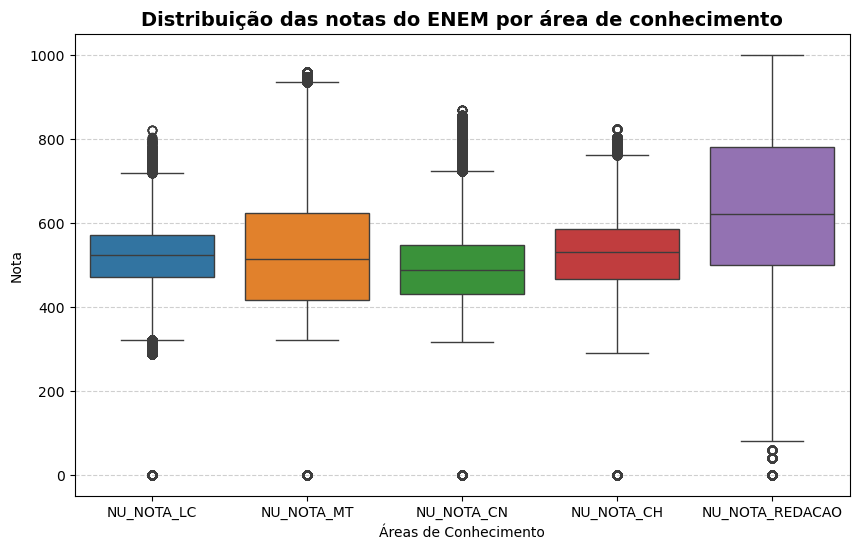

In [133]:
# Lista com as colunas das notas
colunas_notas = ['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[colunas_notas])

# Personalização
plt.title("Distribuição das notas do ENEM por área de conhecimento", fontsize=14, fontweight='bold')
plt.xlabel("Áreas de Conhecimento")
plt.ylabel("Nota")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

A análise do gráfico revela que vários participantes alcançaram notas significativamente acima da média. No entanto, também é possível identificar a presença de outliers com notas muito baixas no tema **"Linguagem e Códigos"**, além de um padrão curioso em **Redação**, onde não há registros de notas acima da média — apenas abaixo. Diante desse cenário, vamos aprofundar a investigação desses casos para identificar possíveis padrões que possam explicar o bom desempenho. Como se tratam de competências distintas, cada uma será analisada separadamente para garantir uma compreensão mais precisa.

Segue agora um discionário dos dados usados nos gráficos.<br>
Definição da faixa etária:<br> 
1 -	Menor de 17 anos<br>
2 -	17 anos<br>
3 -	18 anos<br>
4 -	19 anos<br>
5 -	20 anos<br>
6 -	21 anos<br>
7 -	22 anos<br>
8 -	23 anos<br>
9 -	24 anos<br>
10 -	25 anos<br>
11 - Entre 26 e 30 anos<br>
12 -	Entre 31 e 35 anos<br>
13 -	Entre 36 e 40 anos<br>
14 -	Entre 41 e 45 anos<br>
15 -	Entre 46 e 50 anos<br>
16 -	Entre 51 e 55 anos<br>
17 -	Entre 56 e 60 anos<br>
18 -	Entre 61 e 65 anos<br>
19 -	Entre 66 e 70 anos<br>
20 -	Maior de 70 anos<br>

Definição do tipo de escola: <br>
1 -	Não Respondeu<br>
2 -	Pública<br>
3 -	Privada<br>

Definição do renda familiar **(Q006)**: <br>
A-	Nenhuma Renda <br>
B-	Até 1.320,00<br>
C-	De 1.320,01 até 1.980,00.<br>
D-	De 1.980,01 até 2.640,00.<br>
E-	De 2.640,01 até 3.300,00.<br>
F-	De 3.300,01 até 3.960,00.<br>
G-	De 3.960,01 até 5.280,00.<br>
H-	De 5.280,01 até 6.600,00.<br>
I-	De 6.600,01 até 7.920,00.<br>
J-	De 7.920,01 até 9240,00.<br>
K-	De 9.240,01 até 10.560,00.<br>
L-	De 10.560,01 até 11.880,00.<br>
M-	De 11.880,01 até 13.200,00.<br>
N-	De 13.200,01 até 15.840,00.<br>
O-	De 15.840,01 até 19.800,00.<br>
P-	De 19.800,01 até 26.400,00.<br>
Q-	Acima de 26.400,00.<br>


### <span style="color:#DB8201;">1.1 Notas Acima da Média</span>

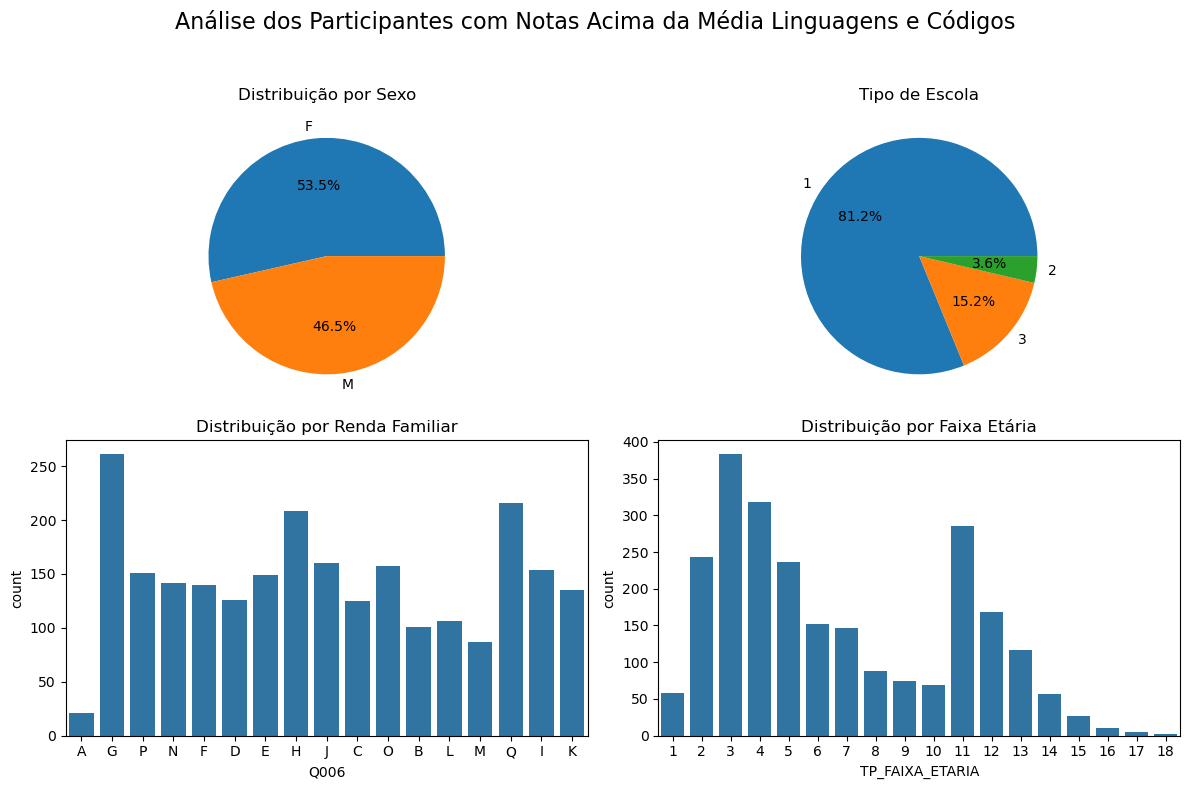

In [96]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_LC'].quantile(0.25)
Q3 = df['NU_NOTA_LC'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_LC'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006', ax=axs[1, 0])
axs[1, 0].set_title('Distribuição por Renda Familiar')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA', ax=axs[1, 1])
axs[1, 1].set_title('Distribuição por Faixa Etária')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Linguagens e Códigos', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

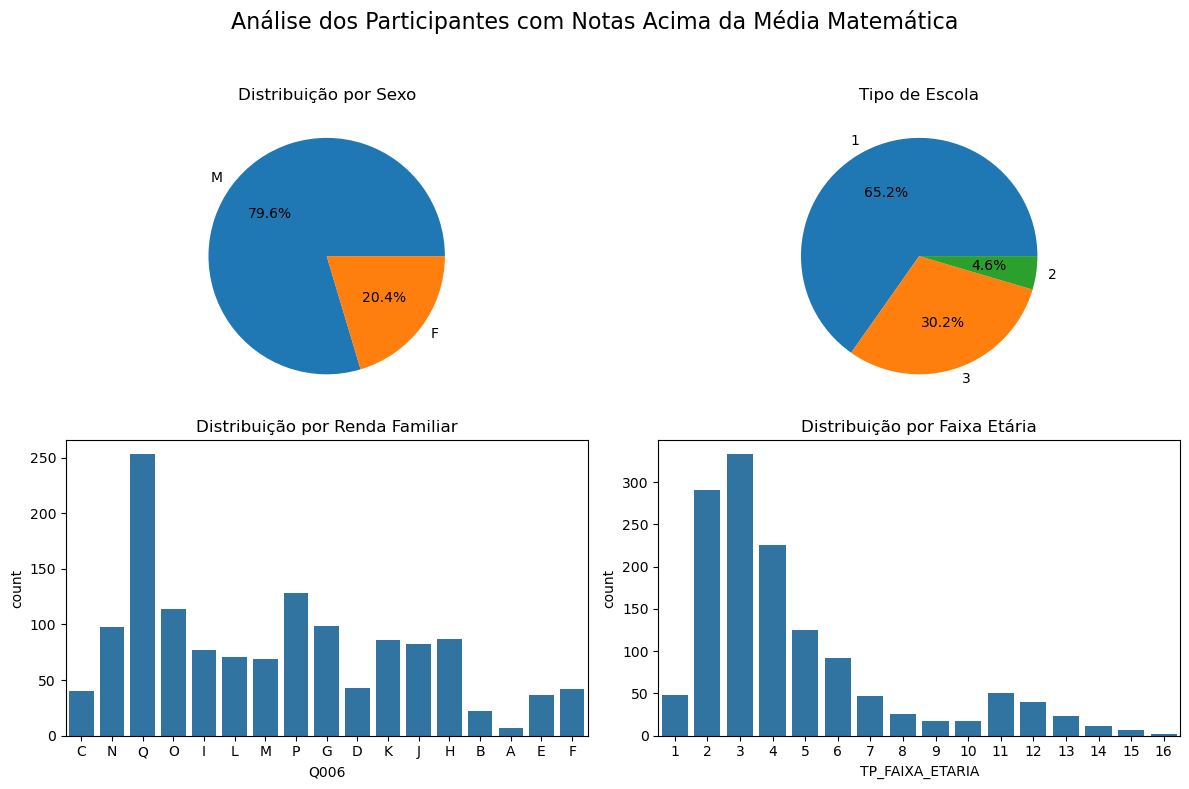

In [100]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_MT'].quantile(0.25)
Q3 = df['NU_NOTA_MT'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_MT'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006', ax=axs[1, 0])
axs[1, 0].set_title('Distribuição por Renda Familiar')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA', ax=axs[1, 1])
axs[1, 1].set_title('Distribuição por Faixa Etária')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Matemática', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

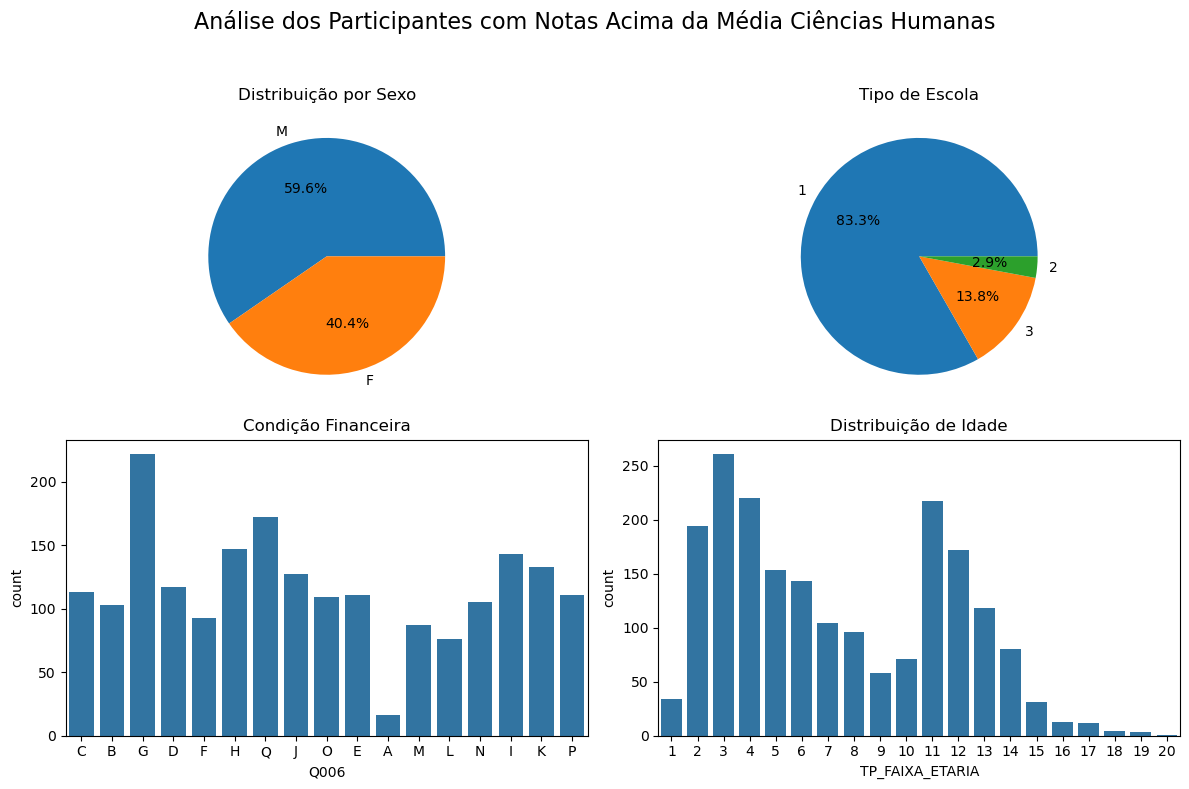

In [79]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_CH'].quantile(0.25)
Q3 = df['NU_NOTA_CH'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_CH'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006', ax=axs[1, 0])
axs[1, 0].set_title('Condição Financeira')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA', ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de Idade')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Ciências Humanas', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

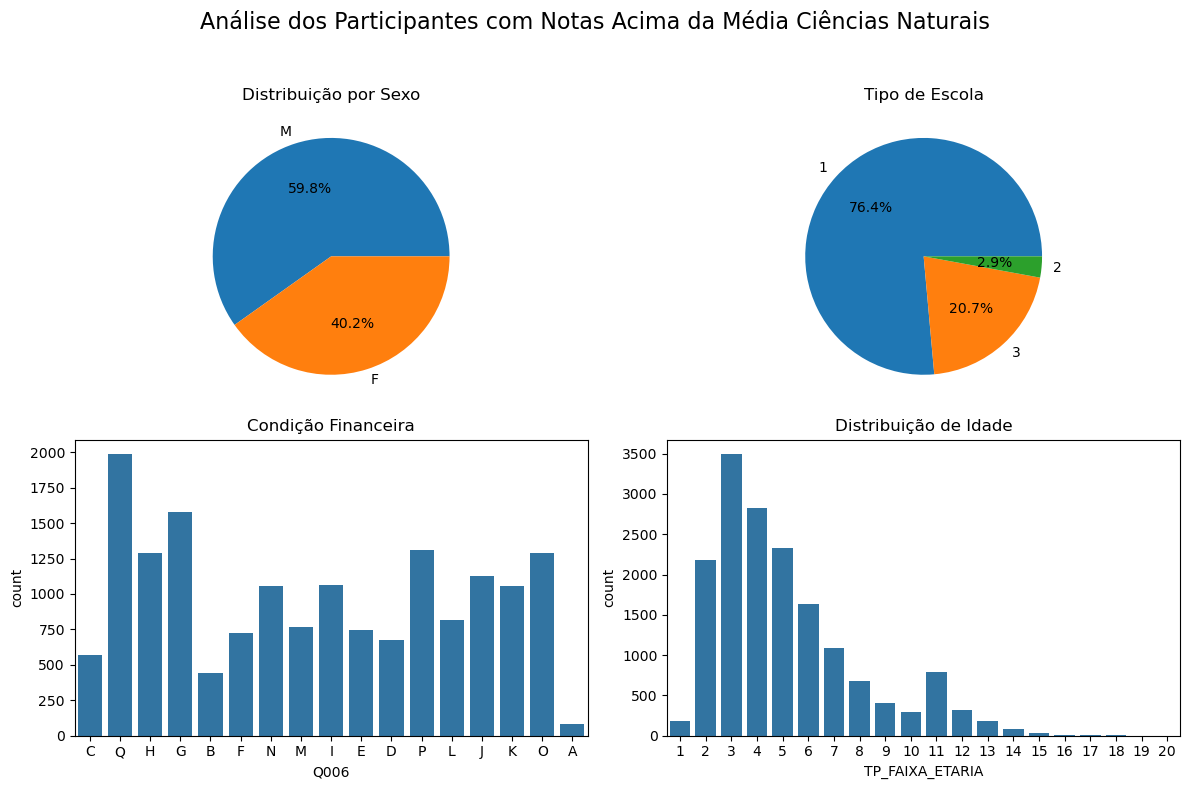

In [69]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_CN'].quantile(0.25)
Q3 = df['NU_NOTA_CN'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_CN'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006', ax=axs[1, 0])
axs[1, 0].set_title('Condição Financeira')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA', ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de Idade')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Ciências Naturais', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

A análise dos gráficos revela alguns padrões interessantes sobre o desempenho dos participantes nas diferentes provas: <br>
* Linguagem e Códigos (Português): As mulheres apresentaram desempenho ligeiramente superior ao dos homens, com maior número de participantes femininas obtendo notas acima da média.

* Matemática: Os homens se destacaram de forma mais acentuada, com um número de notas acima da média mais de 70% superior ao das mulheres.

* Demais provas: Também mostram vantagem masculina, embora com diferenças menos expressivas do que em Matemática.

* Faixa etária: A maioria dos participantes com melhor desempenho tem 18 anos, indicando que são, em geral, estudantes que já concluíram ou estão concluindo o ensino médio. Provavelmente, estão em fase de preparação para ingressar na faculdade, o que pode justificar o maior empenho e desempenho nas provas.

* Renda familiar: Há uma relação clara entre maior renda e melhor desempenho. Isso é especialmente evidente na prova de Matemática, onde os participantes pertencentes à faixa mais alta da classificação socioeconômica obtiveram as maiores notas.


Embora alguns participantes apresentem notas significativamente acima da média e possam ser considerados outliers nesta análise, optamos por mantê-los no conjunto de dados. A exclusão desses casos poderia comprometer a integridade da investigação, já que eles representam desempenhos relevantes que podem contribuir para a compreensão dos fatores associados ao sucesso. Para evitar distorções causadas por esses valores extremos, nas etapas seguintes será utilizada a mediana como medida central das notas, por ser menos sensível à influência dos outliers e oferecer uma representação mais fiel do desempenho geral dos participantes.

## <span style="color:#DB8201;">3. Análise Exploratória (EDA)</span>

Após compreender melhor os outliers presentes neste conjunto de dados, damos início à análise exploratória. Este processo será guiado por um conjunto de perguntas-chave que buscam extrair insights relevantes e aprofundar a compreensão sobre os dados disponíveis.

Durante toda a análise, estas serão as perguntas que orientarão minha investigação:
1. **Quem são os participantes do ENEM?**
    * Qual é a idade média dos participantes?
    * Qual o percentual de alunos que ainda estão cursando o ensino médio?<br>
      
2. **Quais são as médias gerais das notas**
    * Como estão distribuídas as notas — há muitas notas muito baixas ou concentradas em torno da média?
    * Há disparidades regionais que indicam desigualdade de acesso à educação?
      
3. **Há correlação entre as notas das áreas?**
    * Participantes com bom desempenho em uma área tendem a ir bem em outras?<br>
      
4. **O tipo de escola influencia o desempenho?**
    * Comparação entre escolas públicas e privadas.<br>
      
5. **Há disparidades de desempenho por sexo, raça/cor ou renda familiar?**
    * Como fatores socioeconômicos impactam os resultados?<br>
      
6. **Quais são os padrões de nota na redação?**
    * Distribuição, número de redações zeradas, notas máximas.<br>
      
7. **Quais fatores estão associados ao alto desempenho?**
    * Identificação de variáveis que se correlacionam com melhores resultados.<br>

### <span style="color:#DB8201;">3.1 Quem são os participantes do ENEM</span>

Antes de analisar o desempenho dos participantes, é essencial compreender quem são as pessoas que prestam o Exame Nacional do Ensino Médio (ENEM). Essa etapa nos ajuda a contextualizar os resultados e identificar possíveis desigualdades ou padrões de acesso à educação. Para isso, vamos observar:


* O tipo de escola frequentada pelos participantes.

* A cor ou raça declarada.

* O sexo dos participantes.

* A distribuição geográfica dos participantes pelo Brasil.


* A faixa etária dos participantes.

* A renda familiar declarada.

* Se o participante já concluiu o ensino médio ou ainda está cursando.

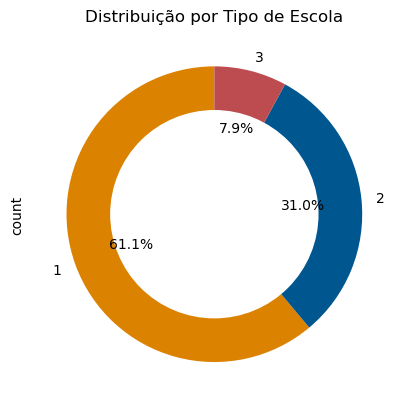

In [163]:
pizza('TP_ESCOLA')
plt.title("Distribuição por Tipo de Escola")
plt.show()

Definição dos números: <br>
1 -	Não Respondeu<br>
2 -	Pública<br>
3 -	Privada<br>

<Figure size 1400x700 with 0 Axes>

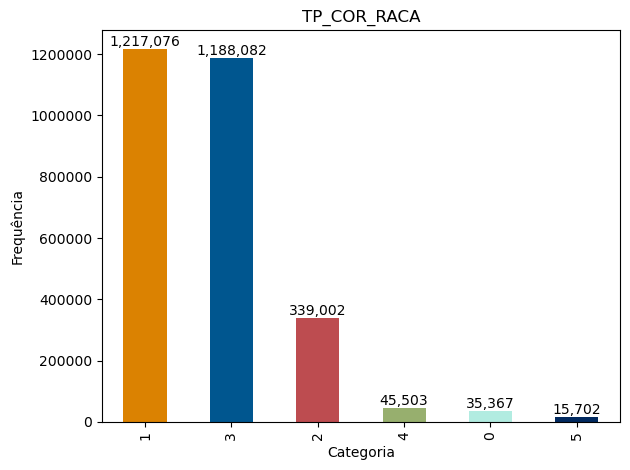

In [196]:
conta('TP_COR_RACA')

Definição Cor e Raça <br>
0 -	Não declarado<br>
1 -	Branca<br>
2 -	Preta<br>
3 -	Parda<br>
4 -	Amarela<br>
5 -	Indígena<br> 
6 -	Não dispõe da informação<br>

Com relação a cor dos participantes é possivel observar que a grande maioria das pessoas que realizaram a prova é de pessoas branca e pardas. 

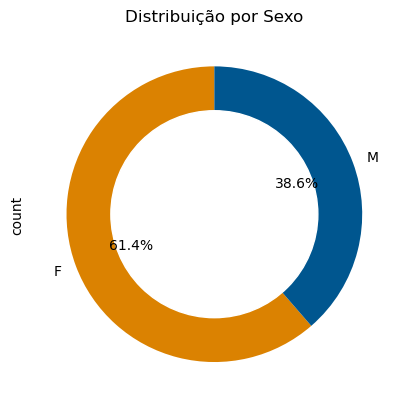

In [157]:
pizza('TP_SEXO')
plt.title("Distribuição por Sexo")
plt.show()

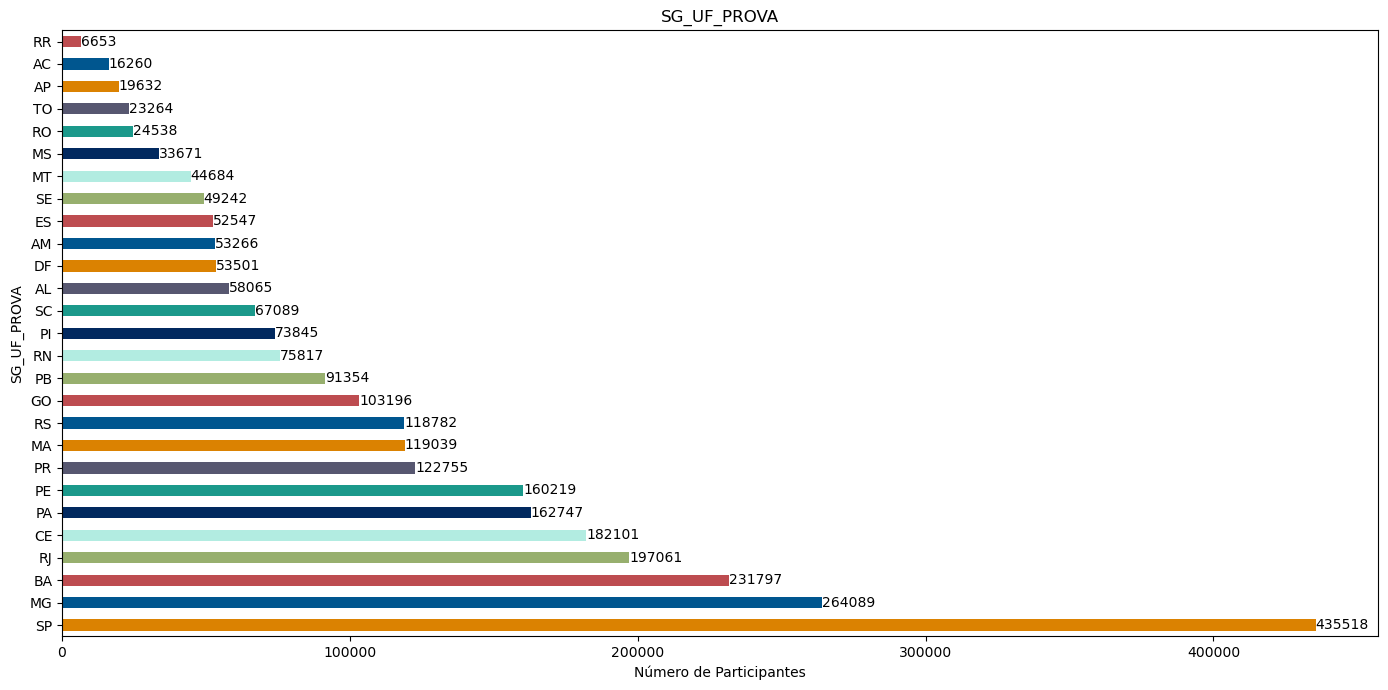

In [176]:
cont_h('SG_UF_PROVA')

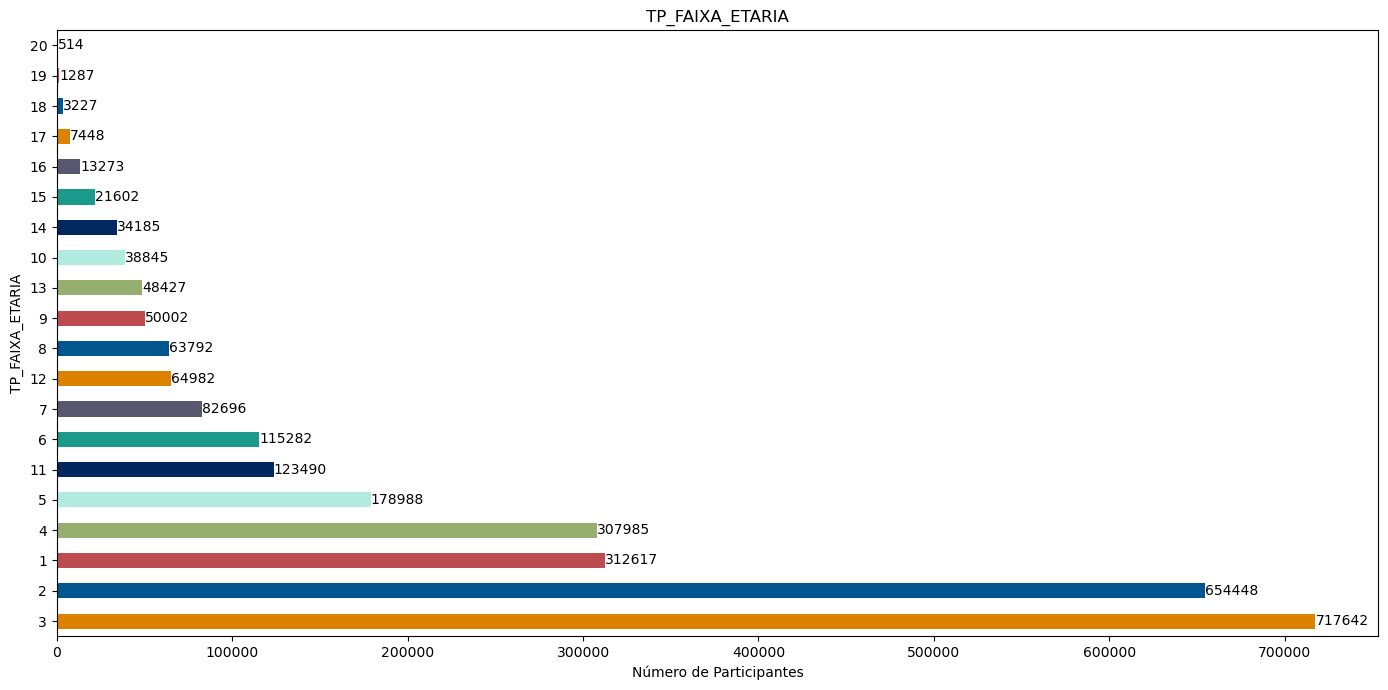

In [181]:
cont_h('TP_FAIXA_ETARIA')

Definição da faixa etária:<br> 
1 -	Menor de 17 anos<br>
2 -	17 anos<br>
3 -	18 anos<br>
4 -	19 anos<br>
5 -	20 anos<br>
6 -	21 anos<br>
7 -	22 anos<br>
8 -	23 anos<br>
9 -	24 anos<br>
10 -	25 anos<br>
11 - Entre 26 e 30 anos<br>
12 -	Entre 31 e 35 anos<br>
13 -	Entre 36 e 40 anos<br>
14 -	Entre 41 e 45 anos<br>
15 -	Entre 46 e 50 anos<br>
16 -	Entre 51 e 55 anos<br>
17 -	Entre 56 e 60 anos<br>
18 -	Entre 61 e 65 anos<br>
19 -	Entre 66 e 70 anos<br>
20 -	Maior de 70 anos<br>

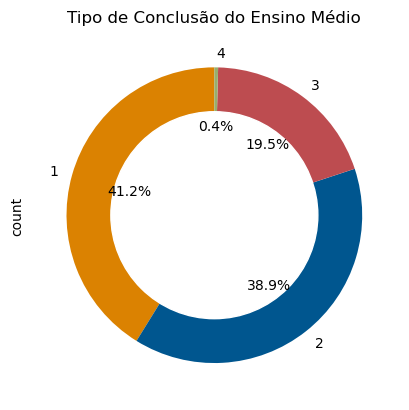

In [191]:
pizza('TP_ST_CONCLUSAO')
plt.title('Tipo de Conclusão do Ensino Médio')
plt.show()

Definição dos números:<br>
1 -	Já concluí o Ensino Médio<br>
2 -	Estou cursando e concluirei o Ensino Médio em 2023<br>
3 -	Estou cursando e concluirei o Ensino Médio após 2023<br>
4 -	Não concluí e não estou cursando o Ensino Médio<br>


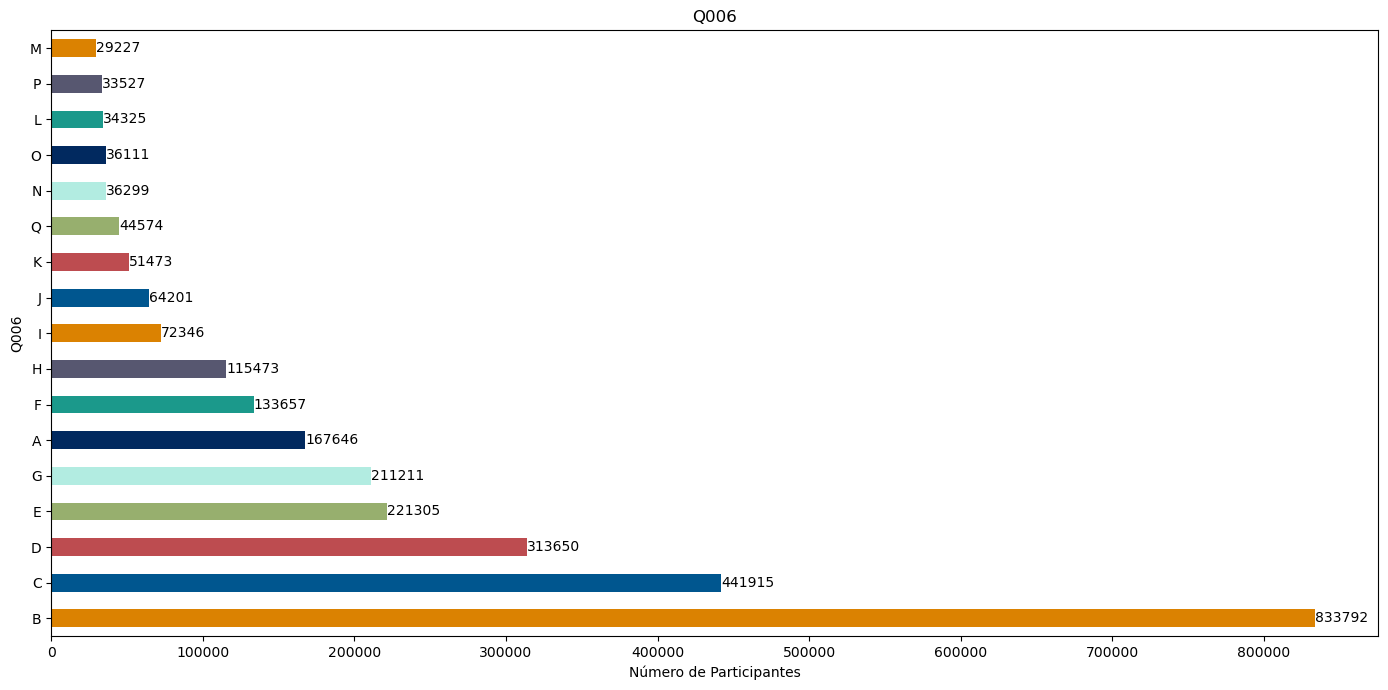

In [183]:
cont_h('Q006')

Definição do renda familiar **(Q006)**: <br>
A-	Nenhuma Renda <br>
B-	Até 1.320,00<br>
C-	De 1.320,01 até 1.980,00.<br>
D-	De 1.980,01 até 2.640,00.<br>
E-	De 2.640,01 até 3.300,00.<br>
F-	De 3.300,01 até 3.960,00.<br>
G-	De 3.960,01 até 5.280,00.<br>
H-	De 5.280,01 até 6.600,00.<br>
I-	De 6.600,01 até 7.920,00.<br>
J-	De 7.920,01 até 9240,00.<br>
K-	De 9.240,01 até 10.560,00.<br>
L-	De 10.560,01 até 11.880,00.<br>
M-	De 11.880,01 até 13.200,00.<br>
N-	De 13.200,01 até 15.840,00.<br>
O-	De 15.840,01 até 19.800,00.<br>
P-	De 19.800,01 até 26.400,00.<br>
Q-	Acima de 26.400,00.<br>

A análise exploratória dos dados do ENEM revela alguns padrões relevantes sobre o perfil dos participantes. Observa-se que mais da metade dos candidatos optou por não informar o tipo de escola frequentada, o que limita uma comparação mais precisa entre o desempenho de alunos de escolas públicas e privadas. Entre os que responderam, aproximadamente 30% são oriundos da rede pública e cerca de 8% da rede privada.

No que diz respeito à cor ou raça, cerca de 80% dos participantes se autodeclaram brancos ou pardos, enquanto menos de 12% se identificam como negros — uma distribuição que reflete, de forma geral, os dados populacionais do Censo de 2022. Além disso, as mulheres representam a maioria entre os inscritos no exame.

A distribuição geográfica mostra forte concentração de participantes no estado de São Paulo, responsável por mais de 15% dos inscritos. Em contraste, Roraima apresenta o menor número de participantes, com pouco mais de 6 mil pessoas.

Quanto à faixa etária, a maioria dos candidatos tem entre 17 e 18 anos, o que indica que boa parte está concluindo o ensino médio e pretende utilizar a nota do ENEM para ingressar no ensino superior. Em relação à renda familiar, quase 30% dos participantes vivem com um salário mínimo, e mais da metade possui renda mensal inferior a R$ 2.000,00 — evidenciando o perfil socioeconômico predominantemente de baixa renda entre os inscritos.

Em síntese, os dados analisados permitem traçar um retrato abrangente dos participantes do ENEM, destacando aspectos sociais, econômicos e regionais que ajudam a compreender melhor o contexto educacional brasileiro.

### <span style="color:#DB8201;">3.2 Quais são as médias gerais das notas</span>

Após compreender o perfil dos participantes do ENEM — incluindo aspectos como faixa etária, tipo de escola, cor, gênero, renda familiar e distribuição geográfica — é hora de avançar para a análise do desempenho acadêmico. Neste tópico, vamos observar as médias gerais das notas obtidas nas diferentes áreas avaliadas pelo exame.

Essa etapa é fundamental para identificar quais competências apresentam maior domínio por parte dos candidatos e quais exigem maior atenção. Ao analisar as médias, também poderemos comparar o desempenho entre as provas e levantar hipóteses sobre os fatores que influenciam os resultados. Para garantir maior precisão, utilizaremos a mediana como medida central, já que ela é menos afetada por valores extremos e oferece uma visão mais equilibrada do desempenho geral.

Primeiro então vamos verificar como os alunos se saem nas notas das provas, 

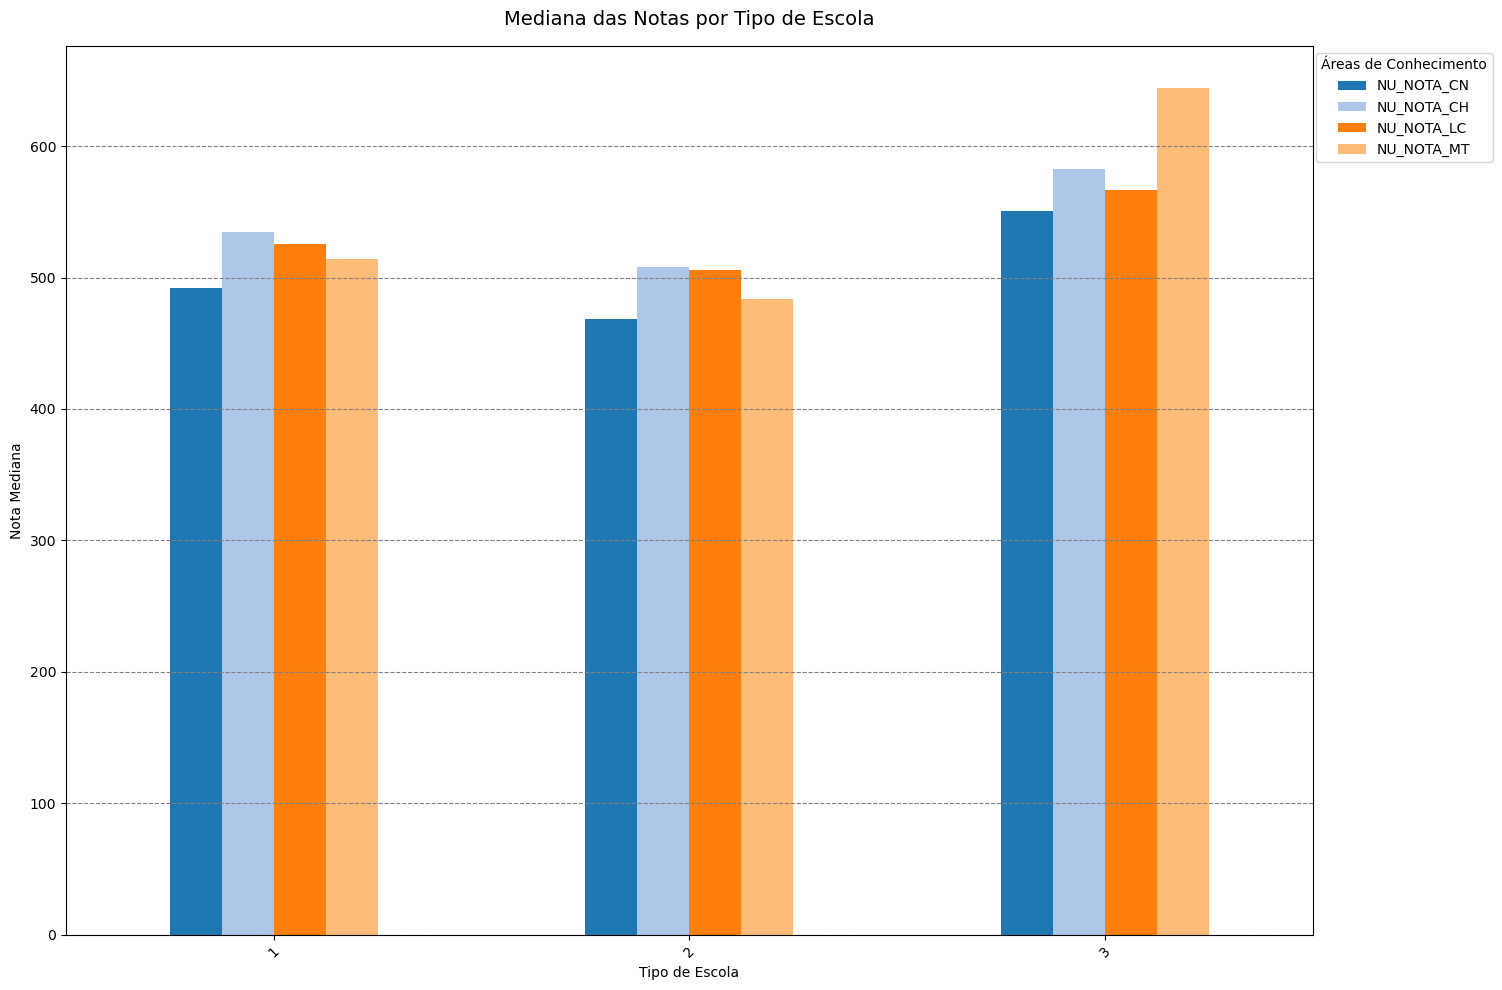

In [76]:
# Gerar paleta com 2 cores (para 2 colunas)

# Define as cores
cores = sns.color_palette("tab20")

# Cria o gráfico
ax = df.groupby('TP_ESCOLA')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].median().plot(
    kind='bar', 
    color=cores, 
    figsize=(15, 10)  
)

# Ajustes de título e eixos
plt.title('Mediana das Notas por Tipo de Escola', fontsize=14, pad=15)
plt.ylabel('Nota Mediana')
plt.xlabel('Tipo de Escola')
plt.grid(True, linestyle='--', color='gray', axis='y')
plt.xticks(rotation=45)

#  Posição da legenda
plt.legend(
    title='Áreas de Conhecimento',
    loc='upper right',      
    bbox_to_anchor=(1.15, 1)  
)

plt.tight_layout()
plt.show()

A partir dos gráficos, é possível observar como a mediana das notas se distribui entre os diferentes tipos de escola. As escolas particulares apresentam desempenho superior em relação às escolas públicas. Um ponto interessante é que, nas escolas públicas, a disciplina com maior mediana de notas foi **Ciências Humanas**, enquanto, nas escolas particulares, **Matemática** se destacou com uma mediana bastante elevada. No entanto, em ambos os tipos de escola — considerando os três pilares avaliados — a disciplina em que os participantes demonstraram maior dificuldade foi **Ciências da Natureza**.

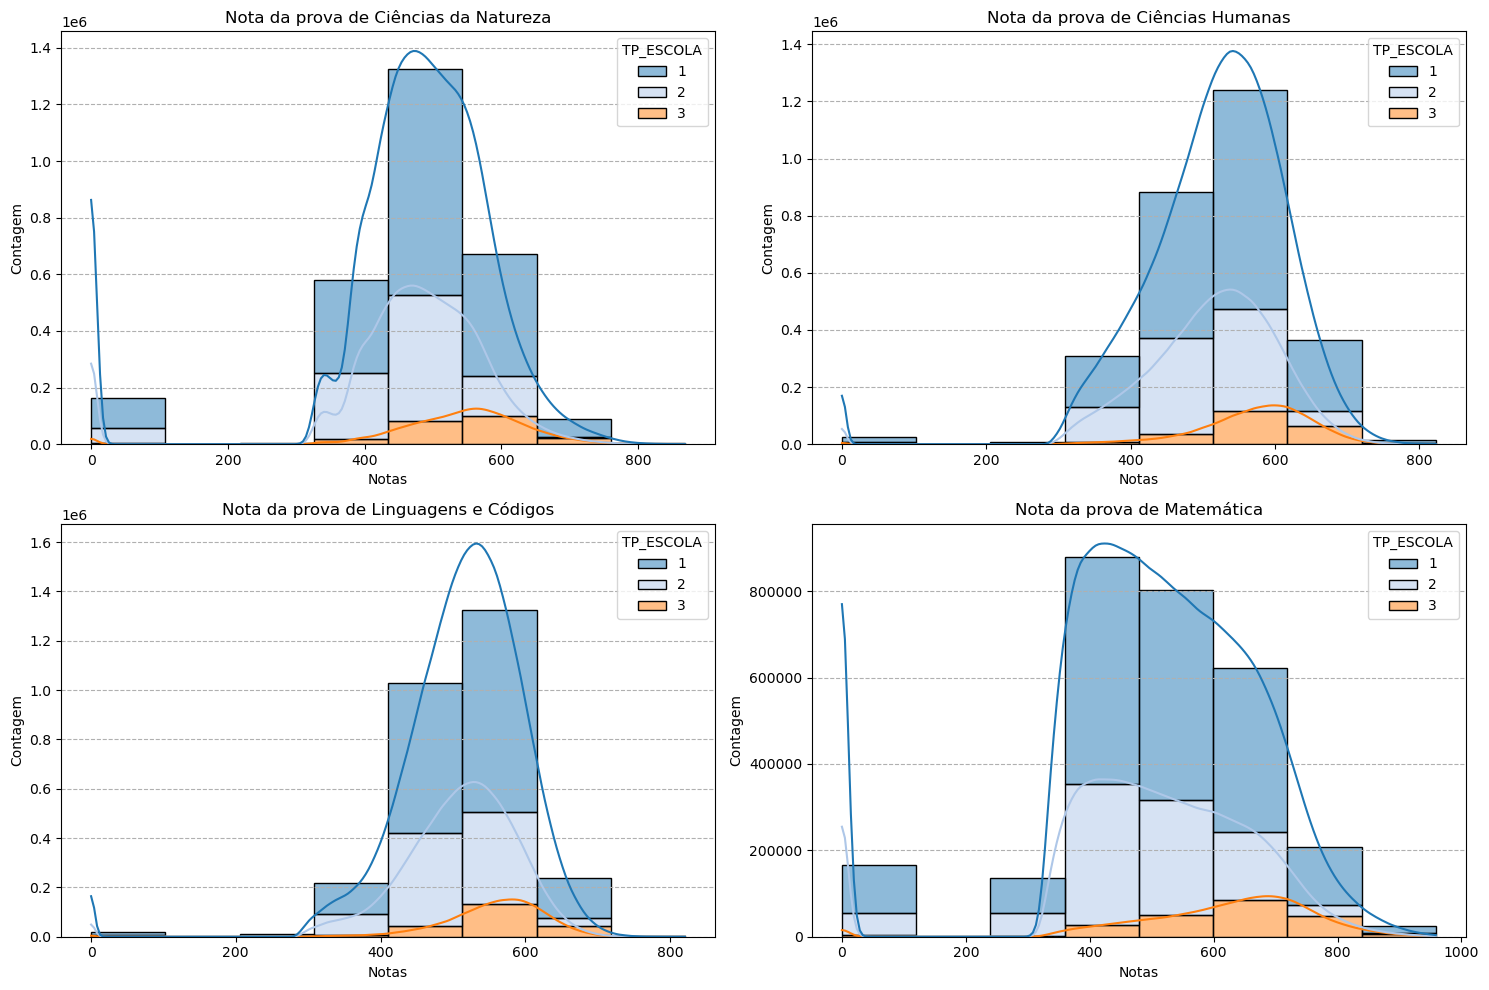

In [92]:
# Criar subplots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_CN', hue='TP_ESCOLA',palette = "tab20", bins=8, kde=True, multiple='stack', ax=axs[0, 0])

axs[0, 0].set_title('Nota da prova de Ciências da Natureza')
axs[0, 0].set_xlabel('Notas')
axs[0, 0].set_ylabel('Contagem')

# Segundo scatter plot
sns.histplot(data=df, x='NU_NOTA_CH', hue='TP_ESCOLA',palette = "tab20", bins=8, kde=True, multiple='stack',ax=axs[0, 1])

axs[0, 1].set_title('Nota da prova de Ciências Humanas')
axs[0, 1].set_xlabel('Notas')
axs[0, 1].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_LC', hue='TP_ESCOLA',palette = "tab20", bins=8, kde=True, multiple='stack', ax=axs[1, 0])

axs[1, 0].set_title('Nota da prova de Linguagens e Códigos')
axs[1, 0].set_xlabel('Notas')
axs[1, 0].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_MT', hue='TP_ESCOLA',palette = "tab20", bins=8, kde=True, multiple='stack', ax=axs[1, 1])

axs[1, 1].set_title('Nota da prova de Matemática')
axs[1, 1].set_xlabel('Notas')
axs[1, 1].set_ylabel('Contagem')


# Adicionando grid apenas no eixo Y com estilo '--'
for ax in (axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]):
    ax.grid(axis='y', linestyle='--')
    
# Exibindo o gráfico
plt.tight_layout()
plt.show()

Ao observar os gráficos, percebe-se que, na maioria das disciplinas, as notas estão concentradas próximas ao centro das distribuições, chegando em alguns casos a se aproximar de uma forma quase simétrica. No entanto, há um ponto importante: vários participantes obtiveram notas muito baixas, o que pode ser observado pelo aumento na frequência de valores próximos de zero em algumas provas. Esse comportamento indica a presença de uma cauda à esquerda na distribuição.

A seguir, vamos analisar como as notas estão distribuídas por estado, para identificar padrões regionais no desempenho dos participantes.

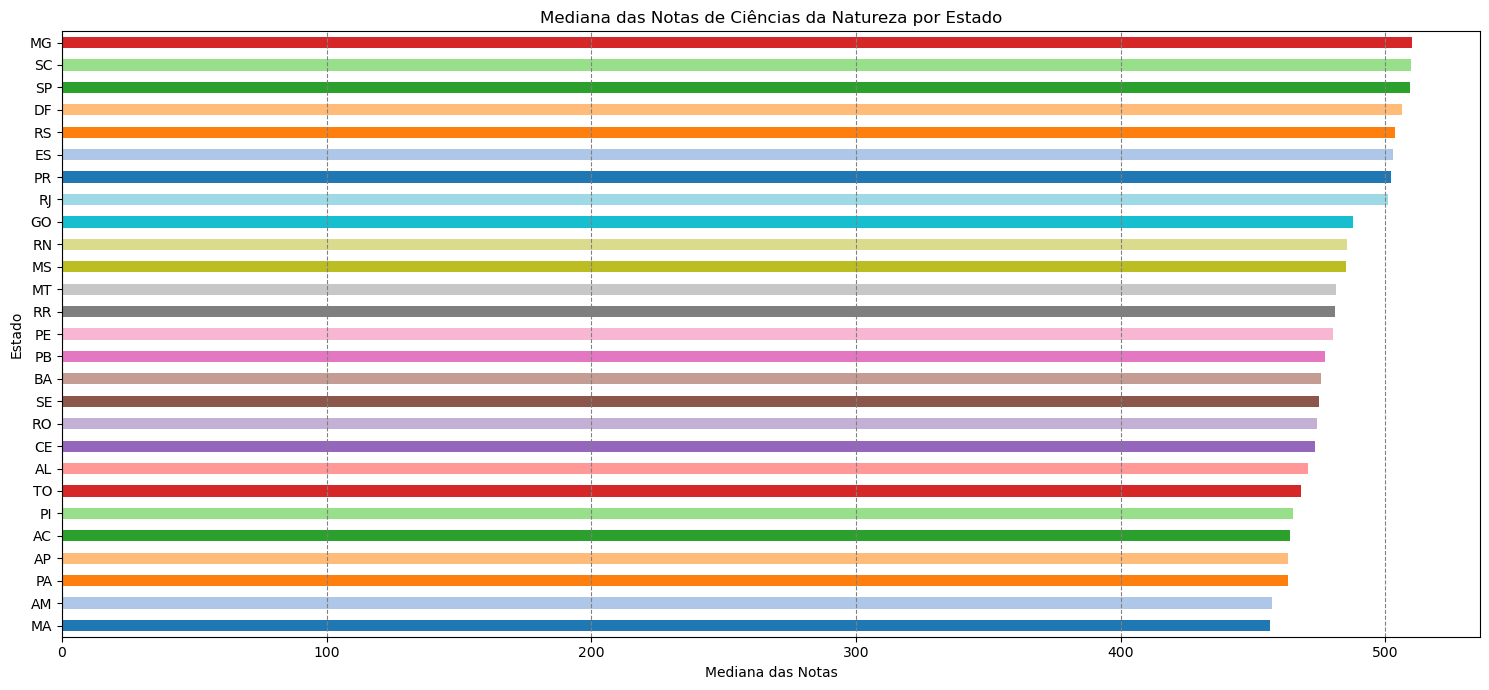

In [181]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['SG_UF_PROVA'])['NU_NOTA_CN'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Ciências da Natureza por Estado')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

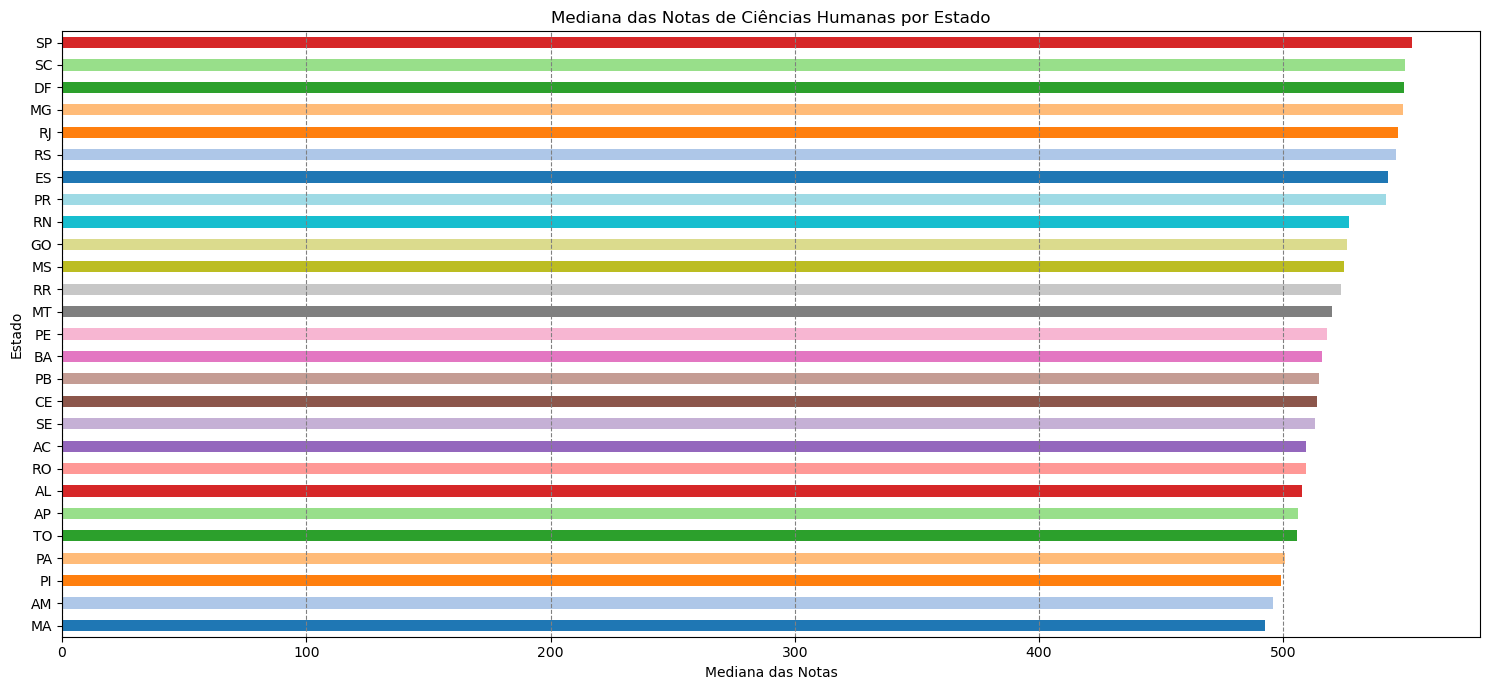

In [189]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['SG_UF_PROVA'])['NU_NOTA_CH'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Ciências Humanas por Estado')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

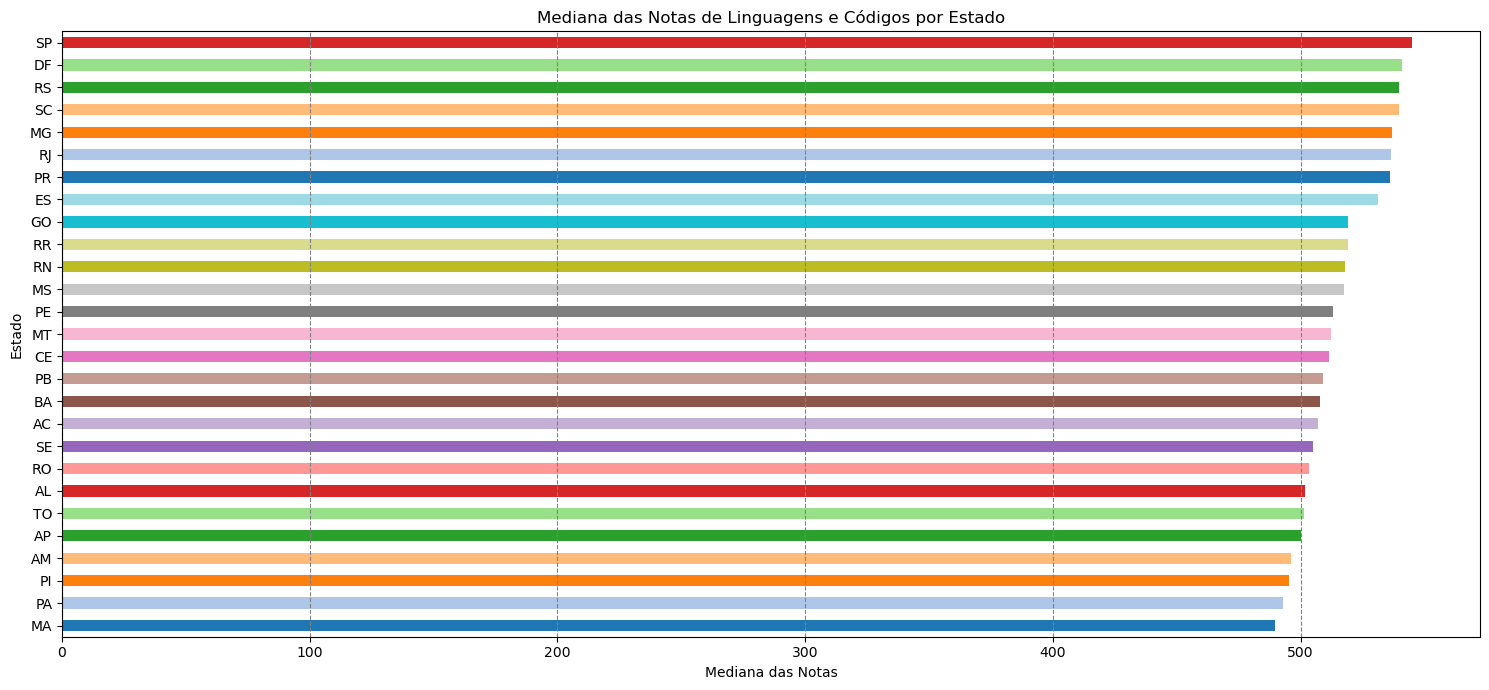

In [191]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['SG_UF_PROVA'])['NU_NOTA_LC'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Linguagens e Códigos por Estado')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

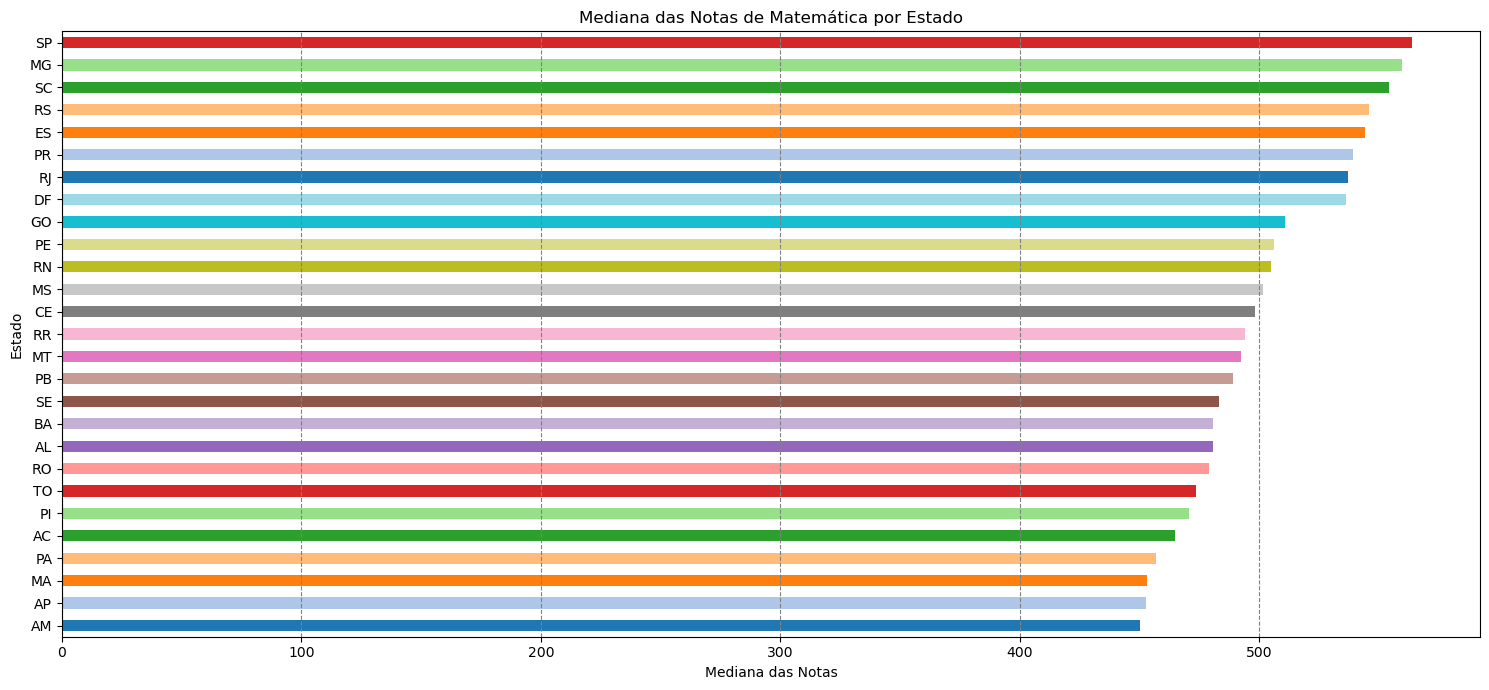

In [193]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['SG_UF_PROVA'])['NU_NOTA_MT'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Matemática por Estado')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

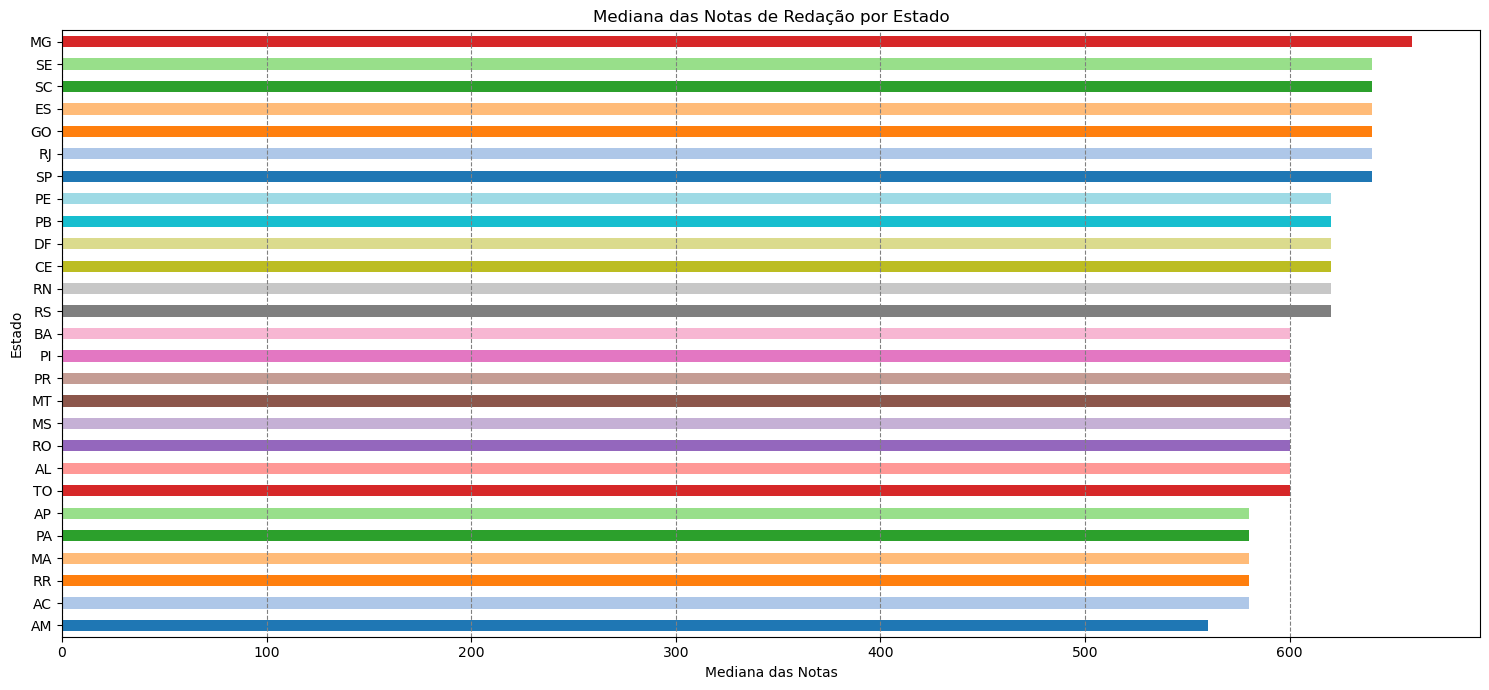

In [195]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['SG_UF_PROVA'])['NU_NOTA_REDACAO'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Redação por Estado')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

Os dados revelam que os alunos de escolas particulares tendem a obter notas mais altas em comparação com os de escolas públicas. A disciplina em que os participantes demonstraram maior dificuldade foi **Ciências da Natureza**, independentemente do tipo de escola. De forma geral, os três grupos seguem um padrão semelhante: **Ciências da Natureza** apresenta as menores medianas, seguida por **Linguagens e Códigos**, e com **Ciências Humanas** ligeiramente acima.

Um ponto que chama atenção é o desempenho em **Matemática**: os alunos de escolas particulares se destacam com notas medianas significativamente mais altas, o que não se repete nos demais grupos. Isso pode indicar uma maior preparação ou foco específico nessa disciplina.

Ao observar a distribuição das notas, nota-se que a maioria dos participantes obteve notas próximas ao centro da distribuição — ou seja, médias a altas. Uma parcela menor apresentou notas muito baixas, o que contribuiu para puxar a média geral para baixo.

A análise por estado também oferece insights importantes sobre os desafios regionais na educação. Em alguns estados, a mediana das notas não atingiu os 500 pontos em nenhuma das provas, enquanto em outros, todas as medianas superaram os 500 pontos. Embora esse valor não seja um parâmetro oficial de desempenho, ele serve como referência comparativa, já que 500 representa um pouco mais da metade da escala — assim como a média 6 costuma ser o mínimo necessário para aprovação em muitas redes de ensino.

Reforçando a dificuldade com Ciências da Natureza, apenas 7 estados apresentaram medianas acima de 500 pontos nessa disciplina, o que reforça seu caráter desafiador para os participantes.

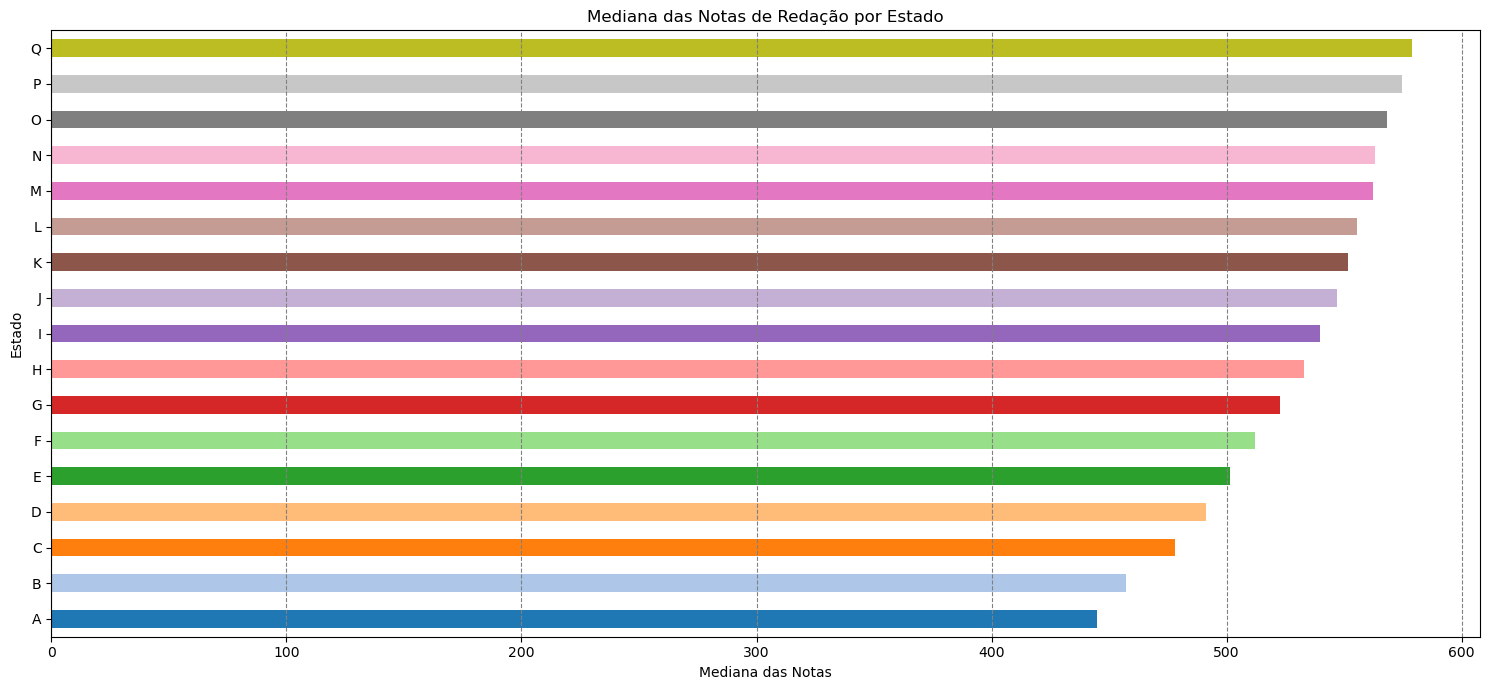

In [201]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['Q006'])['NU_NOTA_CN'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Cieências da Natureza por Renda Familiar')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

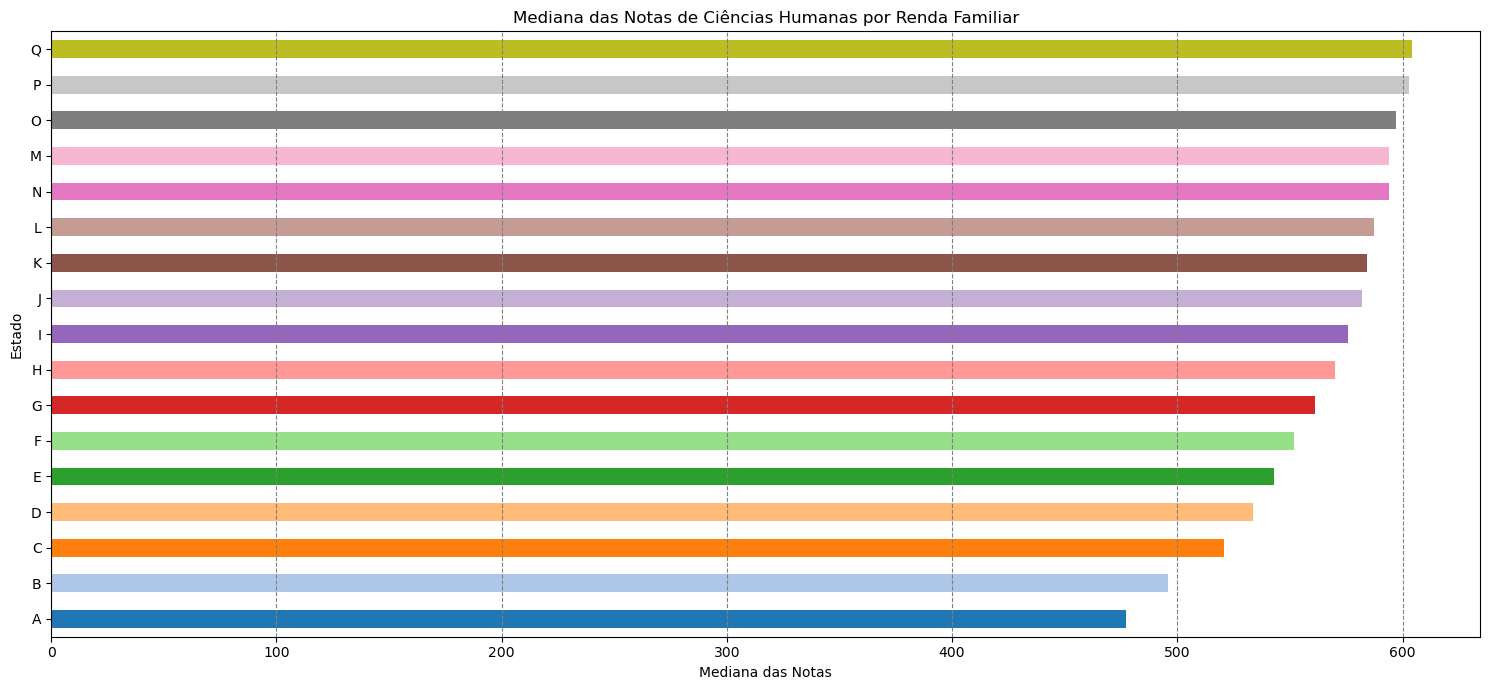

In [207]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['Q006'])['NU_NOTA_CH'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Ciências Humanas por Renda Familiar')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

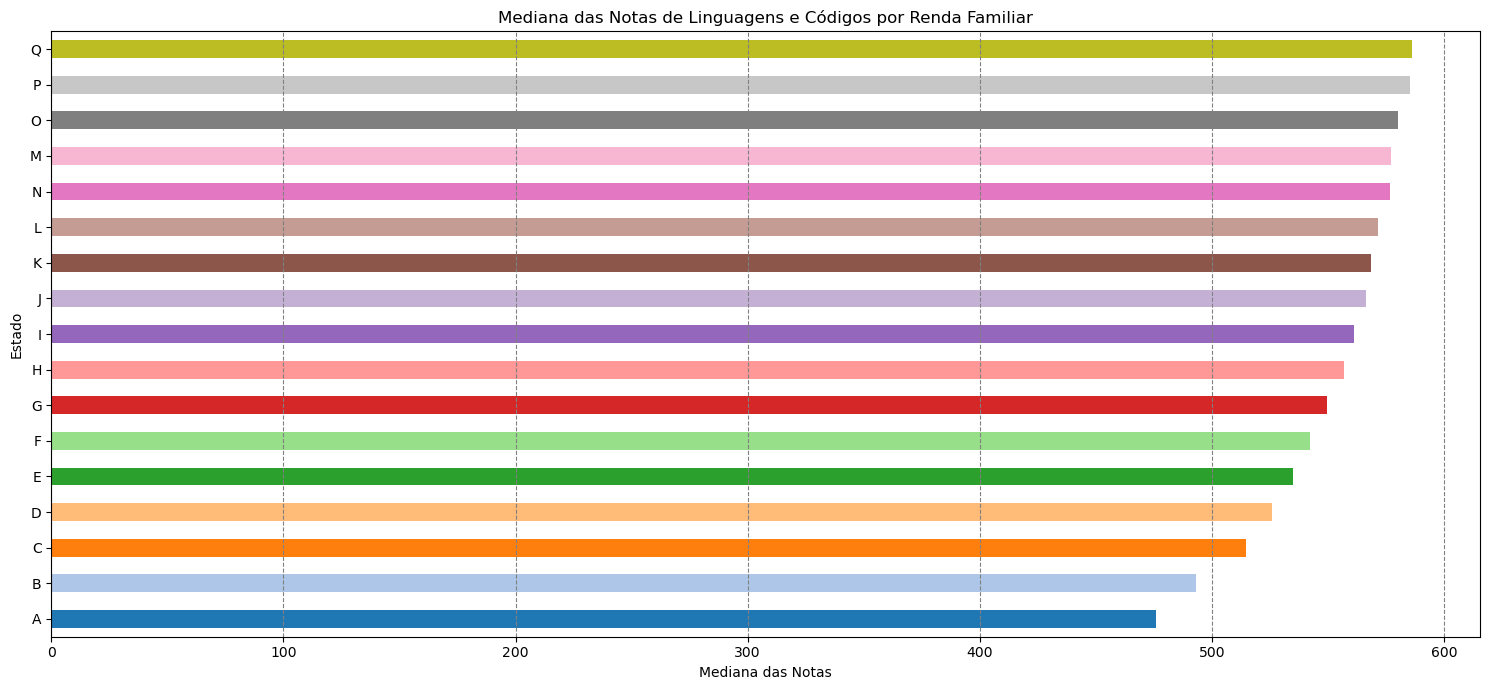

In [205]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['Q006'])['NU_NOTA_LC'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Linguagens e Códigos por Renda Familiar')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

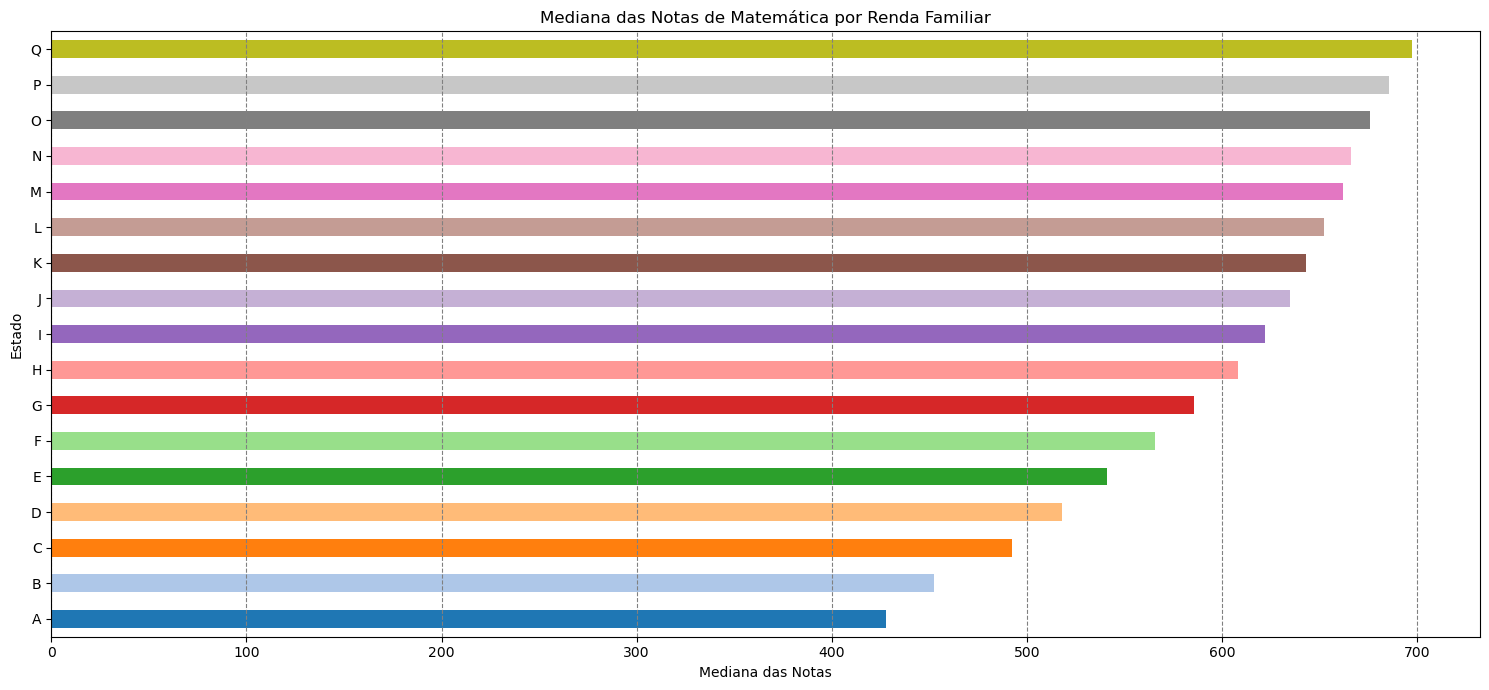

In [215]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['Q006'])['NU_NOTA_MT'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Matemática por Renda Familiar')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

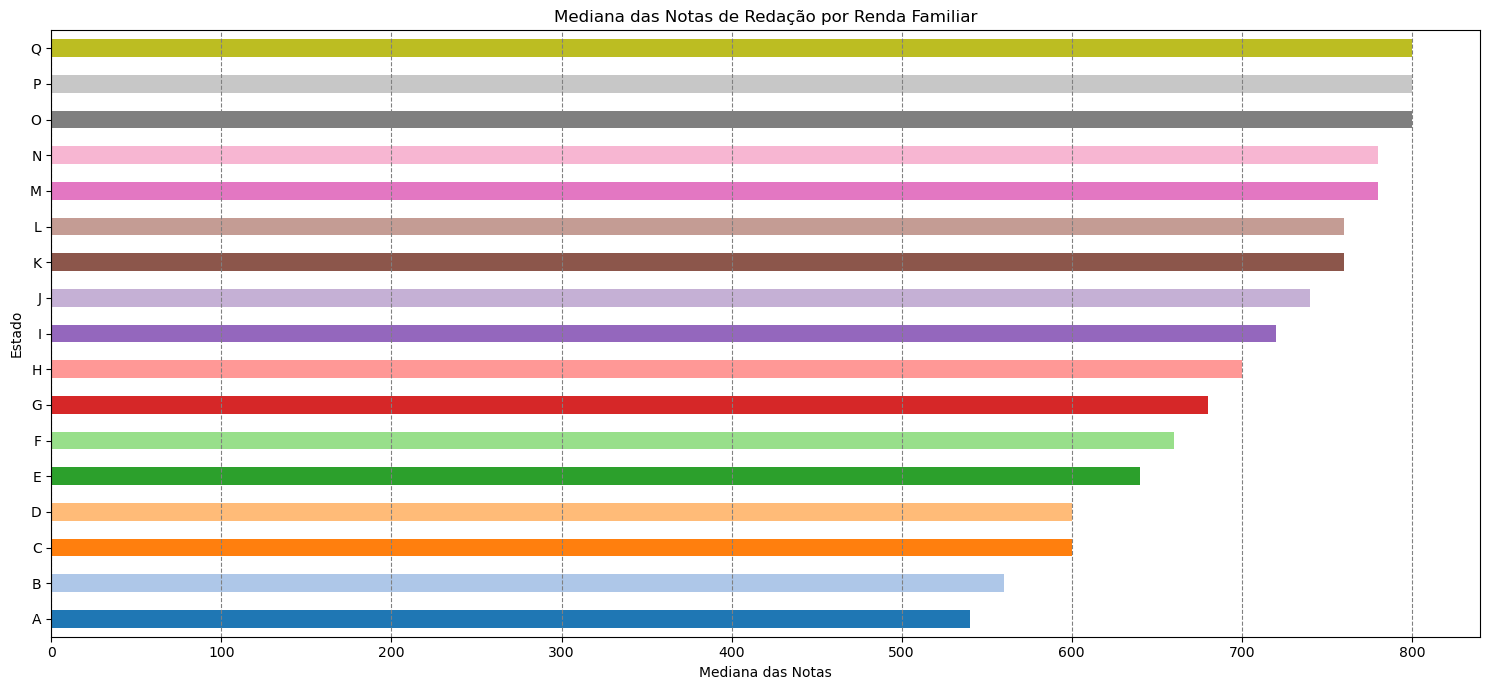

In [213]:
# Supondo que seu DataFrame se chame df e tenha as colunas 'estado', 'tipo_escola' e 'nota'
medianas = df.groupby(['Q006'])['NU_NOTA_REDACAO'].median().sort_values().plot(
    kind='barh', 
    color=cores, 
    figsize=(15, 7)  
)
plt.title('Mediana das Notas de Redação por Renda Familiar')
plt.xlabel('Mediana das Notas')
plt.ylabel('Estado')
plt.grid(True, linestyle='--', color='gray', axis='x')
plt.tight_layout()
plt.show()

A análise mostra uma tendência clara: participantes com maior renda familiar tendem a obter notas mais altas em todas as disciplinas. Os destaques mais expressivos aparecem em Matemática, com medianas próximas a 700 pontos, e em Redação, onde as notas chegam a quase 800 pontos entre os grupos com renda mais elevada.

Esses resultados sugerem que a condição socioeconômica pode influenciar o desempenho dos alunos, possivelmente por fatores como acesso a recursos educacionais, tempo dedicado aos estudos ou ambiente de aprendizagem. Por outro lado, os participantes com menor renda familiar apresentam medianas mais baixas, o que pode refletir desafios adicionais enfrentados no processo de aprendizagem.

Embora os dados não expliquem todas as causas, eles ajudam a entender como diferentes faixas de renda se relacionam com os resultados obtidos nas provas.

### <span style="color:#DB8201;">3.3 Há correlação entre as notas das áreas?</span>

Nesta etapa da análise, o objetivo é investigar se há relação entre o desempenho dos participantes nas diferentes áreas de conhecimento avaliadas. Ou seja, queremos entender se os alunos que vão bem em uma disciplina tendem a apresentar bom desempenho nas demais, ou se os resultados variam de forma independente entre as áreas.

Analisar a correlação entre as notas pode revelar padrões importantes, como a consistência no desempenho individual, possíveis afinidades entre disciplinas, ou até mesmo indicar quais áreas exigem abordagens pedagógicas distintas. Essa investigação contribui para uma compreensão mais ampla do perfil dos participantes e pode oferecer insights relevantes para estratégias educacionais.

In [236]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,n_faltas
0,210061103945,6,F,1,1,1,1,0,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4305108,Caxias do Sul,43,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,4
1,210060214087,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,4
2,210059980948,3,F,1,3,1,2,0,2,1.00,0,2311306.00,QuixadÃ¡,23.00,CE,2.00,1.00,1.00,2311306,QuixadÃ¡,23,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,4
3,210060801601,11,M,1,1,1,1,8,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,3505906,Batatais,35,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,4
4,210059085130,8,M,1,3,1,1,5,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,2408102,Natal,24,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,4


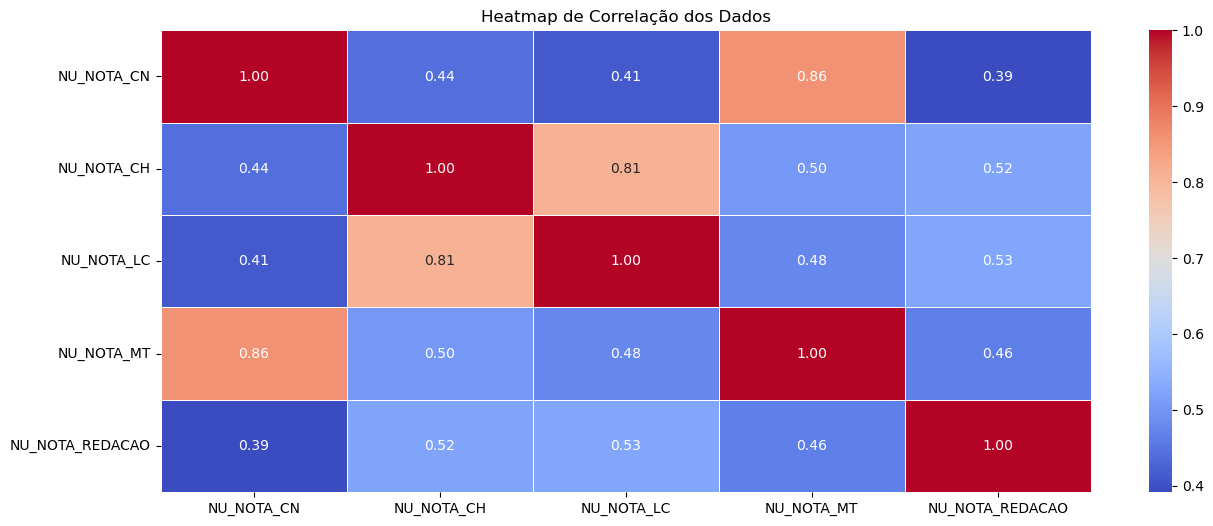

In [261]:
features = df[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

# Calculando a matriz de correlação
corr = features.corr()

# Criando o heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionando títulos
plt.title('Heatmap de Correlação dos Dados')

# Mostrando o gráfico
plt.show()

Os dados revelam uma forte correlação entre as notas de **Matemática** e **Ciências da Natureza**, com um coeficiente de 0.86. Isso indica que os participantes que apresentam bom desempenho em uma dessas áreas têm alta probabilidade de se sair bem na outra, o que pode refletir habilidades cognitivas compartilhadas, como raciocínio lógico, resolução de problemas e interpretação de fenômenos quantitativos.

Também foi observada uma correlação significativa entre **Ciências Humanas** e **Linguagens e Códigos**, o que pode estar relacionado à natureza das disciplinas — ambas exigem competências como leitura, interpretação de textos, argumentação e análise crítica, características mais associadas ao campo das ciências humanas e sociais.

Em relação à **Redação**, os dados apontam uma correlação moderada (coeficiente de 0.5) com **Ciências Humanas** e **Linguagens e Códigos**, sugerindo que o desempenho na produção textual pode estar parcialmente relacionado às habilidades desenvolvidas nessas áreas, como organização de ideias, domínio da linguagem e capacidade de argumentação.

Essas correlações contribuem para compreender como o desempenho dos participantes se distribui entre as diferentes áreas do conhecimento e oferecem indicativos de afinidades cognitivas que podem orientar estratégias pedagógicas e análises educacionais mais aprofundadas.

## agagag

In [178]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,n_faltas
0,210061103945,6,F,1,1,1,1,0,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4305108,Caxias do Sul,43,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,4
1,210060214087,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,4
2,210059980948,3,F,1,3,1,2,0,2,1.00,0,2311306.00,QuixadÃ¡,23.00,CE,2.00,1.00,1.00,2311306,QuixadÃ¡,23,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,4
3,210060801601,11,M,1,1,1,1,8,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,3505906,Batatais,35,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,4
4,210059085130,8,M,1,3,1,1,5,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,2408102,Natal,24,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,4


In [27]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,n_faltas
0,210061103945,6,F,1,1,1,1,0,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4305108,Caxias do Sul,43,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,4
1,210060214087,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,4
2,210059980948,3,F,1,3,1,2,0,2,1.00,0,2311306.00,QuixadÃ¡,23.00,CE,2.00,1.00,1.00,2311306,QuixadÃ¡,23,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,4
3,210060801601,11,M,1,1,1,1,8,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,3505906,Batatais,35,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,4
4,210059085130,8,M,1,3,1,1,5,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,2408102,Natal,24,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,4


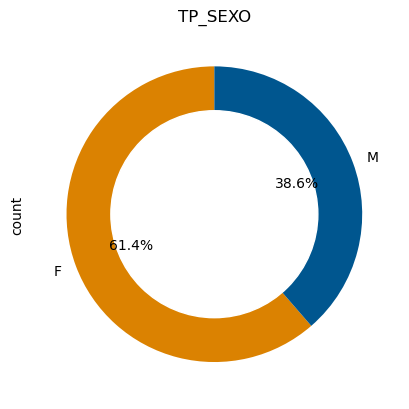

In [129]:
pizza('TP_SEXO')

Definição dos números: <br>
0 -	Não declarado<br>
1 -	Branca<br>
2 -	Preta<br>
3 -	Parda<br>
4 -	Amarela<br>
5 -	Indígena<br> 
6 -	Não dispõe da informação<br>

Com relação a cor dos participantes é possivel observar que a grande maioria das pessoas que realizaram a prova é de pessoas branca e pardas. 

In [ ]:
cont_h('TP_FAIXA_ETARIA')

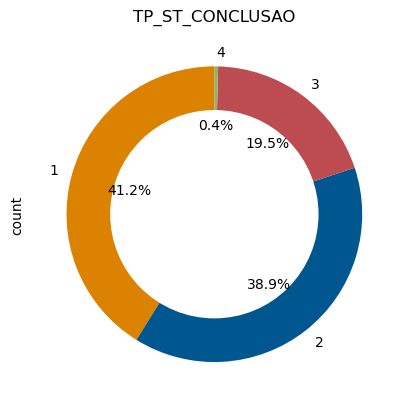

In [187]:
pizza('TP_ST_CONCLUSAO')

Definição dos números:<br>
1 -	Já concluí o Ensino Médio<br>
2 -	Estou cursando e concluirei o Ensino Médio em 2023<br>
3 -	Estou cursando e concluirei o Ensino Médio após 2023<br>
4 -	Não concluí e não estou cursando o Ensino Médio<br>

A Maioria dos candidatos ou ja concluiu o ensino média ou vai concluir em 2023

In [ ]:
cont_h('TP_ANO_CONCLUIU')

Definição dos números: <br>
0 -	Não informado<br>
1 -	2022<br>
2 -	2021<br>
3 -	2020<br>
4 -	2019<br>
5 -	2018<br>
6 -	2017<br>
7 -	2016<br>
8 -	2015<br>
9 -	2014<br>
10 -	2013<br>
11 -	2012<br>
12 -	2011<br>
13 -	2010<br>
14 -	2009<br>
15 -	2008<br>
16 -	2007<br>
17 -	Antes de 2007<br>

A grande maioria dos participantes ainda não terminou o ensino médio

In [ ]:
pizza('TP_ESCOLA')

Definição dos números: <br>
1 -	Não Respondeu<br>
2 -	Pública<br>
3 -	Privada<br>

In [ ]:
pizza('TP_ENSINO')

Definição dos números: <br>
1 -	Ensino Regular<br>
2 -	Educação Especial - Modalidade Substitutiva<br>

In [ ]:
pizza('IN_TREINEIRO')

In [147]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,n_faltas
0,210061103945,6,F,1,1,1,1,0,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4305108,Caxias do Sul,43,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,4
1,210060214087,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,4
2,210059980948,3,F,1,3,1,2,0,2,1.00,0,2311306.00,QuixadÃ¡,23.00,CE,2.00,1.00,1.00,2311306,QuixadÃ¡,23,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,4
3,210060801601,11,M,1,1,1,1,8,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,3505906,Batatais,35,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,4
4,210059085130,8,M,1,3,1,1,5,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,2408102,Natal,24,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,4


Definição dos números: <br>
1 -	Sim<br>
0 -	Não

Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos.

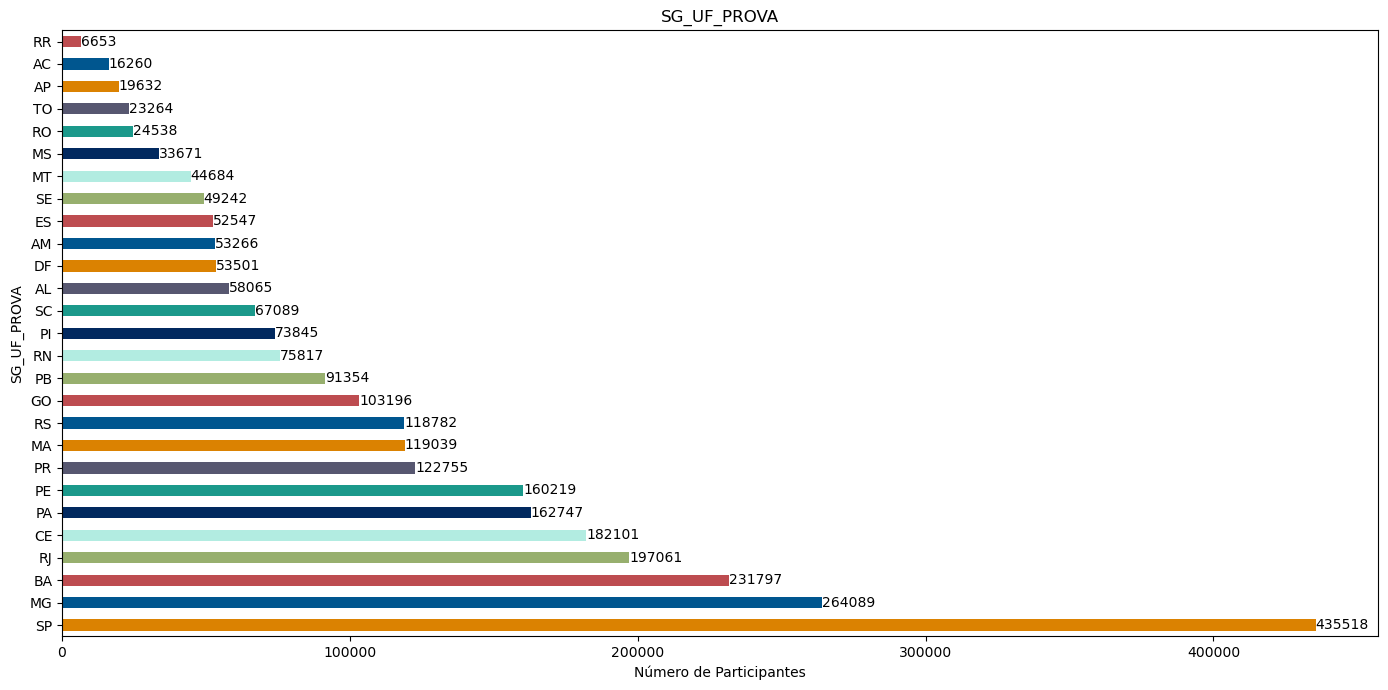

In [149]:
cont_h('SG_UF_PROVA')

In [ ]:
cont_h('TP_DEPENDENCIA_ADM_ESC')

Definição dos números: <br>
1 -	Federal<br>
2 -	Estadual<br>
3 -	Municipal<br>
4 -	Privada<br>

In [ ]:
pizza('TP_LOCALIZACAO_ESC')

Definição dos números: <br>
1 -	Urbana<br>
2 -	Rural

In [ ]:
# Criar subplots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_CN', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=True, multiple='stack', ax=axs[0, 0])

axs[0, 0].set_title('Nota da prova de Ciências da Natureza')
axs[0, 0].set_xlabel('Notas')
axs[0, 0].set_ylabel('Contagem')

# Segundo scatter plot
sns.histplot(data=df, x='NU_NOTA_CH', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=True, multiple='stack',ax=axs[0, 1])

axs[0, 1].set_title('Nota da prova de Ciências Humanas')
axs[0, 1].set_xlabel('Notas')
axs[0, 1].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_LC', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=True, multiple='stack', ax=axs[1, 0])

axs[1, 0].set_title('Nota da prova de Linguagens e Códigos')
axs[1, 0].set_xlabel('Notas')
axs[1, 0].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_MT', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=True, multiple='stack', ax=axs[1, 1])

axs[1, 1].set_title('Nota da prova de Matemática')
axs[1, 1].set_xlabel('Notas')
axs[1, 1].set_ylabel('Contagem')


# Adicionando grid apenas no eixo Y com estilo '--'
for ax in (axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]):
    ax.grid(axis='y', linestyle='--')
    
# Exibindo o gráfico
plt.tight_layout()
plt.show()

Aqui já vemos algumas informações interessantes:<br> 
. As provas de ciências da natureza, ciências humanas linguagens e códigos tem uma distribuição similar das notas, parecendo uma distribuição normal. Mas quando olhamos para a prova de matemática vemos uma distribuição diferente.<br> 
. Quando olhamos entre as notas das escolas particulares e públicas, vemos que a média das escolas particulares é maior.<br>
. Nas provas de matemática e ciências naturais ocoreram a maior quantidade de notas zero.


In [ ]:
cont_h('TP_STATUS_REDACAO')

Definição dos números: <br>
1 -	Sem problemas<br>
2 -	Anulada<br>
3 -	Cópia Texto Motivador<br>
4 -	Em Branco<br>
6 -	Fuga ao tema<br>
7 -	Não atendimento ao tipo textual<br>
8 -	Texto insuficiente<br>
9 -	Parte desconectada<br>

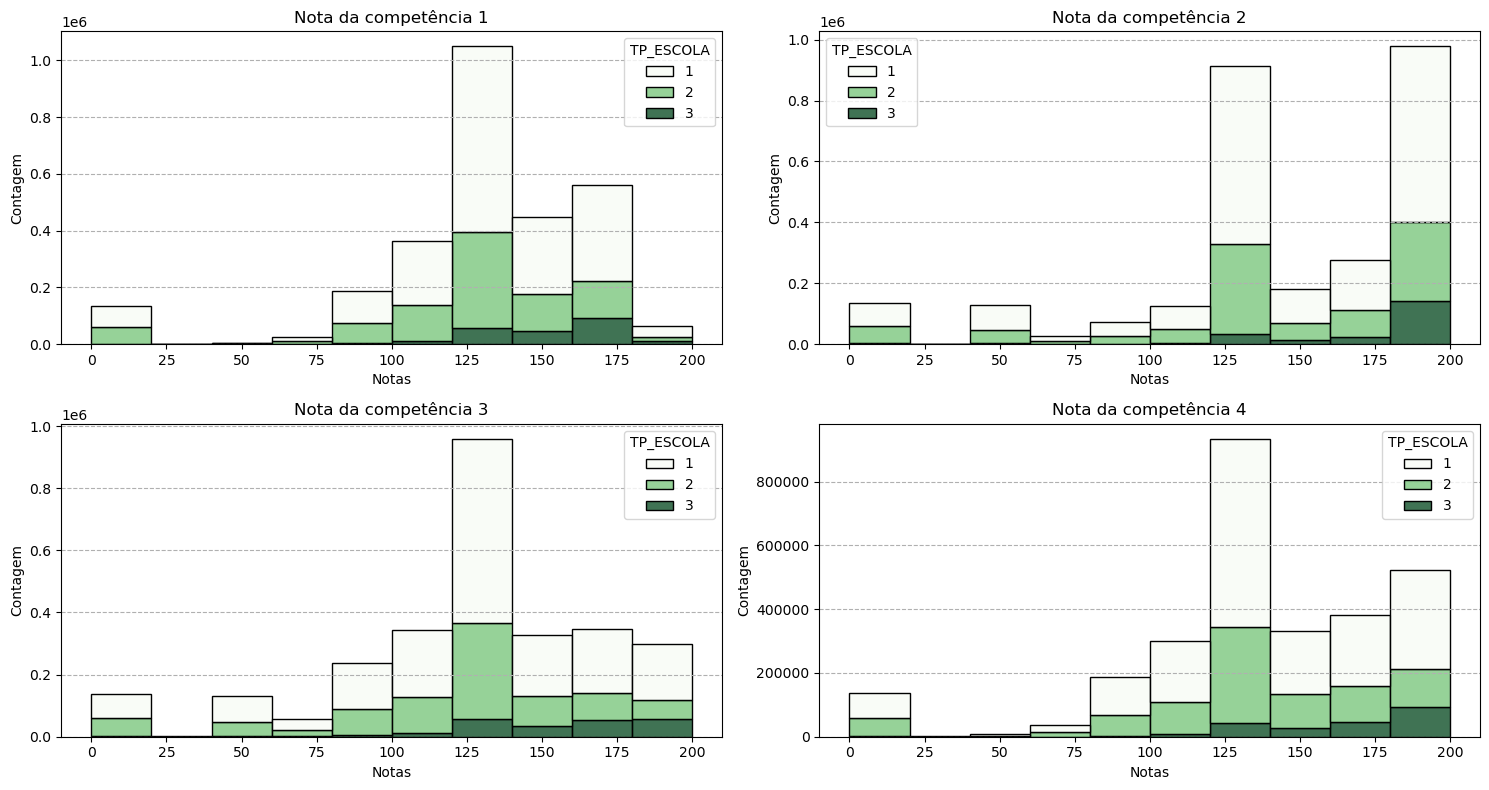

In [32]:
# Criar subplots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_COMP1', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=False, multiple='stack', ax=axs[0, 0])

axs[0, 0].set_title('Nota da competência 1')
axs[0, 0].set_xlabel('Notas')
axs[0, 0].set_ylabel('Contagem')

# Segundo scatter plot
sns.histplot(data=df, x='NU_NOTA_COMP2', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=False, multiple='stack',ax=axs[0, 1])

axs[0, 1].set_title('Nota da competência 2')
axs[0, 1].set_xlabel('Notas')
axs[0, 1].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_COMP3', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=False, multiple='stack', ax=axs[1, 0])

axs[1, 0].set_title('Nota da competência 3')
axs[1, 0].set_xlabel('Notas')
axs[1, 0].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_COMP4', hue='TP_ESCOLA',palette = 'Greens', bins=10, kde=False, multiple='stack', ax=axs[1, 1])

axs[1, 1].set_title('Nota da competência 4')
axs[1, 1].set_xlabel('Notas')
axs[1, 1].set_ylabel('Contagem')


# Adicionando grid apenas no eixo Y com estilo '--'
for ax in (axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]):
    ax.grid(axis='y', linestyle='--')
    
# Exibindo o gráfico
plt.tight_layout()
plt.show()

Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.<br>
Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.<br>
Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.<br>
Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.

In [ ]:
# Criar histograma
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='NU_NOTA_REDACAO', hue='TP_ESCOLA', bins=30,palette = 'Greens', kde=True, multiple='stack')

plt.xlabel('Nota da prova')
plt.ylabel('Frequência')
plt.title(f'Nota da prova de redação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Criar subplots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# Primeiro scatter plot
sns.countplot(data=df, x='Q001', hue='TP_ESCOLA',palette = 'Greens', ax=axs[0, 0])

axs[0, 0].set_title('Série seu pai, ou o homem responsável estudou')
axs[0, 0].set_xlabel('Notas')
axs[0, 0].set_ylabel('Contagem')

# Segundo scatter plot
sns.countplot(data=df, x='Q002', hue='TP_ESCOLA',palette = 'Greens', ax=axs[0, 1])

axs[0, 1].set_title('Série seu pai, ou o homem responsável estudou')
axs[0, 1].set_xlabel('Grupos')
axs[0, 1].set_ylabel('Contagem')

# Primeiro scatter plot
sns.countplot(data=df, x='Q003', hue='TP_ESCOLA',palette = 'Greens', ax=axs[1, 0])

axs[1, 0].set_title('Tipo de trabalho do pai ou do homem responsável')
axs[1, 0].set_xlabel('Grupos')
axs[1, 0].set_ylabel('Contagem')

# Primeiro scatter plot
sns.countplot(data=df, x='Q003', hue='TP_ESCOLA',palette = 'Greens', ax=axs[1, 1])

axs[1, 1].set_title('Tipo de trabalho da mãe ou da mulher responsável')
axs[1, 1].set_xlabel('Grupos')
axs[1, 1].set_ylabel('Contagem')


# Adicionando grid apenas no eixo Y com estilo '--'
for ax in (axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]):
    ax.grid(axis='y', linestyle='--')
    
# Exibindo o gráfico
plt.tight_layout()
plt.show()